<a href="https://colab.research.google.com/github/dayananikol/CCADMACL_PROJECT_COM222/blob/main/HAC_ADML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn
import kagglehub
import pandas as pd
import os
import sklearn
import yellowbrick
import matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import umap

In [ ]:
print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"UMAP version: {umap.__version__}")
print(f"yellowbrick version: {yellowbrick.__version__}")
print(f"kagglehub version: {kagglehub.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")


pandas version: 2.2.2
NumPy version: 1.26.4
seaborn version: 0.13.2
scikit-learn version: 1.6.1
UMAP version: 0.5.7
yellowbrick version: 1.5
kagglehub version: 0.3.10
matplotlib version: 3.10.0


In [ ]:
# Download the dataset
path = kagglehub.dataset_download("mexwell/drug-consumption-classification")
print("Path to dataset files:", path)

# Inspect the downloaded directory
print("Files in the directory:")
print(os.listdir(path))

# Update the path to point to the correct location of the data.
#Get the file name:
file_name = os.listdir(path)[0]
data_path = os.path.join(path, file_name)

#display all columns
pd.set_option('display.max_columns', None)
# Make the dataframe:
df = pd.read_csv(data_path, sep=",")  # Read in the data from the correct path.


print("First 5 records:")
print(df.head())

100%|██████████| 56.3k/56.3k [00:00<00:00, 26.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mexwell/drug-consumption-classification/versions/1
Files in the directory:
['drug_consumption.csv']
First 5 records:
   ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore   Cscore  Impulsive       SS Alcohol Amphet Amyl Benzos  \
0 -0.58331 -0.91699 -0.00665   -0.21712 -1.18084     CL5    CL2  CL0    CL2   
1  1.43533  0.76096 -0.14277   -0.71126 -0.21575     CL5    CL2  CL2    CL0   
2 -0.84732 -1.62090 -1.01450   -1.37983  0.40148     CL6    CL0  CL0    CL0   
3 -0.01928  0.59042  0.58489   -1.3

In [ ]:
is_duplicate = df.duplicated()
print(is_duplicate)

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

0       False
1       False
2       False
3       False
4       False
        ...  
1880    False
1881    False
1882    False
1883    False
1884    False
Length: 1885, dtype: bool
Number of duplicate rows: 0


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Education,0
Country,0
Ethnicity,0
Nscore,0
Escore,0
Oscore,0
Ascore,0


In [ ]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

## Data Preprocessing

In [ ]:
df.drop(columns='ID', inplace=True)
df.head(2)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


In [ ]:
# Filter out rows with 'CL1', 'CL2', 'CL3', or 'CL4' in 'Semer'
df = df[~df['Semer'].isin(['CL1', 'CL2', 'CL3', 'CL4'])]
df = df.reset_index(drop=True)  # Reset the index (optional)

In [ ]:
df['Semer'].value_counts()

,count
Semer,
CL0,1877


In [ ]:
df.drop(['Semer'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1877 non-null   float64
 1   Gender     1877 non-null   float64
 2   Education  1877 non-null   float64
 3   Country    1877 non-null   float64
 4   Ethnicity  1877 non-null   float64
 5   Nscore     1877 non-null   float64
 6   Escore     1877 non-null   float64
 7   Oscore     1877 non-null   float64
 8   Ascore     1877 non-null   float64
 9   Cscore     1877 non-null   float64
 10  Impulsive  1877 non-null   float64
 11  SS         1877 non-null   float64
 12  Alcohol    1877 non-null   object 
 13  Amphet     1877 non-null   object 
 14  Amyl       1877 non-null   object 
 15  Benzos     1877 non-null   object 
 16  Caff       1877 non-null   object 
 17  Cannabis   1877 non-null   object 
 18  Choc       1877 non-null   object 
 19  Coke       1877 non-null   object 
 20  Crack   

In [ ]:
# 1. Identify target columns.
drug_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
             'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']

# 2. Create a mapping dictionary.
cl_mapping = {'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6}

# 3. Apply the mapping to the drug columns.
for col in drug_cols:
    df[col] = df[col].map(cl_mapping)

##Feature Engineering

In [ ]:
# Define lists of drugs
legal_substances = ['Alcohol', 'Amyl', 'Caff', 'Cannabis', 'Choc', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']
illicit_drugs = ['Amphet', 'Benzos',  'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD']

# For each individual, count the number of legal substances used frequently (usage >= 4)
df['legal_high'] = df[legal_substances].apply(lambda row: sum(row >= 4), axis=1)

# Count the number of illicit drugs used at least occasionally (usage >= 3)
df['illicit_occ'] = df[illicit_drugs].apply(lambda row: sum(row >= 3), axis=1)

# Create a composite risk score by summing the two counts
df['composite_risk'] = df['legal_high'] + df['illicit_occ']

# Define a threshold (e.g., 3 or more) to classify as high drug use
threshold = 8
df['high_drug_use'] = df['composite_risk'] >= threshold

In [ ]:
df['high_drug_use'] = df['high_drug_use'].map({False: 0, True: 1})

In [ ]:
df['high_drug_use'].value_counts()

,count
high_drug_use,
0,1397
1,480


##Data Exploration

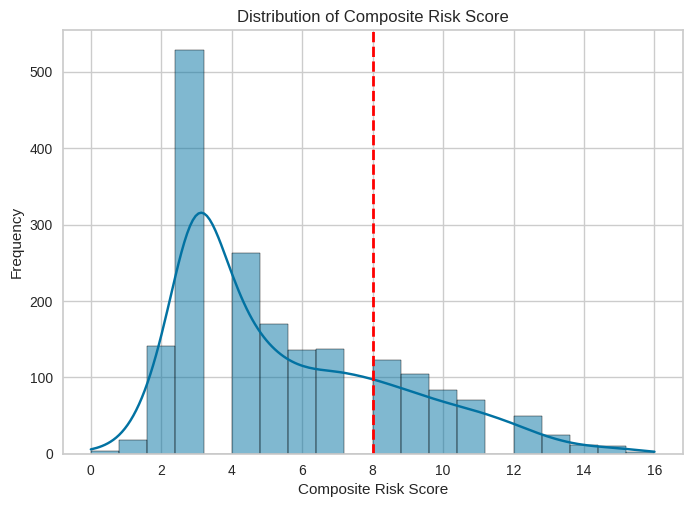

In [ ]:
sns.histplot(df['composite_risk'], bins=20, kde=True)
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Composite Risk Score')
plt.ylabel('Frequency')
plt.title('Distribution of Composite Risk Score')
plt.show()

In [ ]:
# 4. Make sure that the remaining columns are numerical
# Check which ones are not numerical
non_numerical = df.select_dtypes(exclude=['number']).columns
print('Non-numerical columns:', non_numerical)

# Convert non-numerical columns to numeric
df[non_numerical] = df[non_numerical].apply(pd.to_numeric)

Non-numerical columns: Index([], dtype='object')


In [ ]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,legal_high,illicit_occ,composite_risk,high_drug_use
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,3,0,3,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,5,2,7,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,3,0,3,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,3,1,4,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,3,0,3,0


In [ ]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,legal_high,illicit_occ,composite_risk,high_drug_use
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,3,0,3,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,5,2,7,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,3,0,3,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,3,1,4,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,3,0,3,0


##Principal Component Analysis (PCA) for Dimensionality Reduction

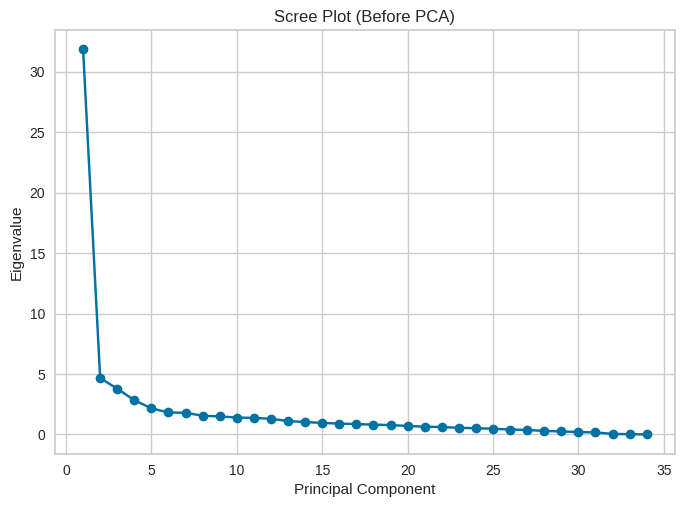

Cumulative Variance Explained: [0.47019567 0.53905569 0.59495198 0.63679455 0.66865784 0.6955099
 0.72194529 0.74485289 0.76690361 0.78759459 0.80780104 0.82696476
 0.84335099 0.85853092 0.87265624 0.88590813 0.8986482  0.91060159
 0.92209262 0.93246296 0.94199115 0.95107332 0.95922274 0.96680867
 0.97383685 0.97990629 0.98538904 0.98973354 0.99341594 0.99642134
 0.99893445 0.99961257 1.         1.        ]


In [ ]:
# 5. Calculate the covariance matrix
cov_matrix = np.cov(df, rowvar=False)

# 6. Calculate the eigenvalues
eigenvalues = np.linalg.eigvals(cov_matrix)

# 7. Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# 8. Create the scree plot
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o')
plt.title('Scree Plot (Before PCA)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# 9. Calculate and print the explained variance ratio
total_variance = sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Variance Explained:", cumulative_variance)

In [ ]:
# 10. the number of components based on the scree plot
n_components = 2

pca = PCA(n_components=n_components)
# Fit the PCA model and transform the data in separate steps
PCA_features = df[['Age',	'Gender',	'Education',	'Country',	'Ethnicity',	'Nscore',	'Escore',	'Oscore',	'Ascore',	'Cscore',	'Impulsive',	'SS', 'legal_high',	'illicit_occ']]
pca.fit(PCA_features)  # Fit PCA on the selected features
PCA_transformed_data = pca.transform(PCA_features) # Transform the data

# Create the DataFrame using the transformed data
PCA_ds = pd.DataFrame(PCA_transformed_data, columns=[f"col{i+1}" for i in range(n_components)])
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1877.0,-1.514209e-16,2.568222,-3.670950,-2.109987,-0.850779,1.865432,8.105066
col2,1877.0,-6.246114e-17,1.380891,-4.869582,-0.894569,0.001223,0.882271,4.634738


In [ ]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("cumulative variance", cumulative_variance)

Explained variance of PC1 0.42426470891714996
Explained variance of PC2 0.12265645288715905
cumulative variance [0.42426471 0.54692116]


##Clustering Analysis

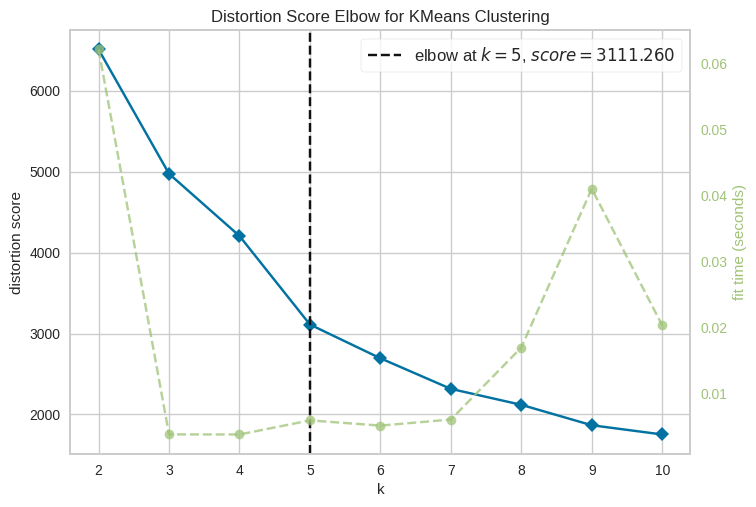

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

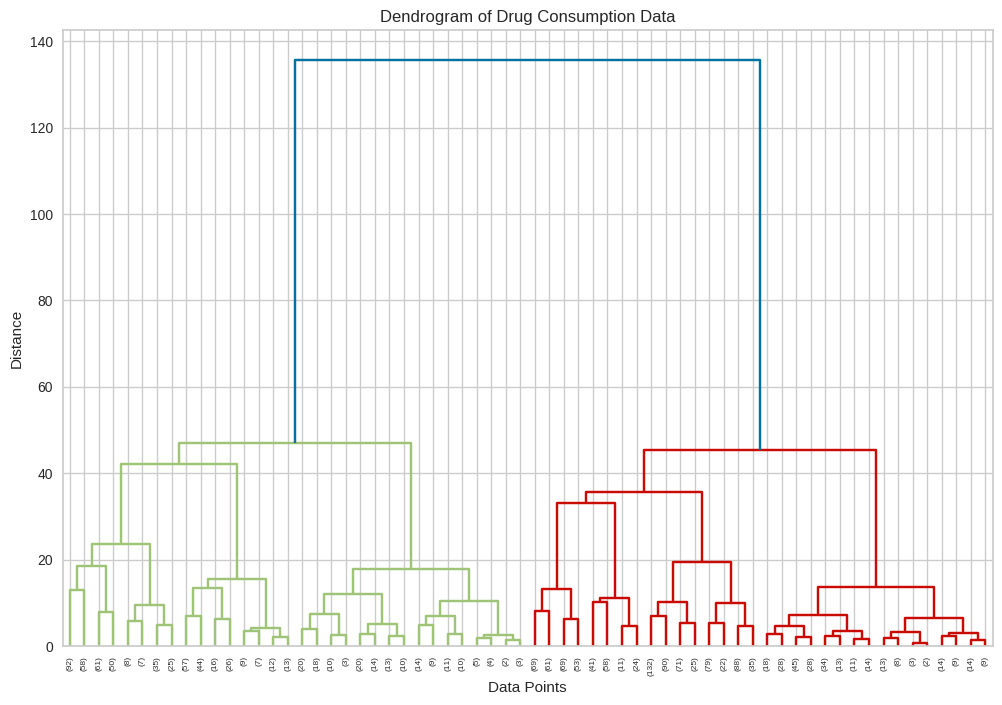

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(PCA_ds, 'ward')

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='level',  # Show only the last 'p' levels
           p=5)  # Adjust 'p' to control the level of detail
plt.title('Dendrogram of Drug Consumption Data')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Clustering with KMeans
PCA_kmeans = PCA_ds.copy()
kmeans = KMeans(n_clusters=3, random_state=40, n_init='auto', max_iter=300, tol=0.0001, verbose=2, algorithm='lloyd')
PCA_kmeans['KMeans_Cluster'] = kmeans.fit_predict(PCA_kmeans)

# Evaluate KMeans
silhouette_avg_kmeans = silhouette_score(PCA_kmeans.drop('KMeans_Cluster', axis=1), PCA_kmeans['KMeans_Cluster'])
print(f"The average silhouette_score of KMeans is : {silhouette_avg_kmeans}")
db_index_kmeans = davies_bouldin_score(PCA_kmeans.drop('KMeans_Cluster', axis=1), PCA_kmeans['KMeans_Cluster'])
print(f"The Davies-Bouldin Index of KMeans is: {db_index_kmeans}")
ch_index_kmeans = calinski_harabasz_score(PCA_kmeans.drop('KMeans_Cluster', axis=1), PCA_kmeans['KMeans_Cluster'])
print(f"The Calinski-Harabasz Index of KMeans is: {ch_index_kmeans}")
print()


# Clustering with Agglomerative
PCA_agg = PCA_ds.copy()
agg_clustering = AgglomerativeClustering(n_clusters=2,  linkage='ward',compute_distances=True)
PCA_agg['Agglomerative_Cluster'] = agg_clustering.fit_predict(PCA_agg)

# Evaluate Agglomerative
silhouette_avg_agg = silhouette_score(PCA_agg.drop('Agglomerative_Cluster', axis=1), PCA_agg['Agglomerative_Cluster'])
print(f"The average silhouette_score of Agglomerative is : {silhouette_avg_agg}")
db_index_agg = davies_bouldin_score(PCA_agg.drop('Agglomerative_Cluster', axis=1), PCA_agg['Agglomerative_Cluster'])
print(f"The Davies-Bouldin Index of Agglomerative is: {db_index_agg}")
ch_index_agg = calinski_harabasz_score(PCA_agg.drop('Agglomerative_Cluster', axis=1), PCA_agg['Agglomerative_Cluster'])
print(f"The Calinski-Harabasz Index of Agglomerative is: {ch_index_agg}")
print()


# Clustering with DBSCAN
PCA_dbscan = PCA_ds.copy()
dbscan = DBSCAN(eps=0.5, min_samples=4) # Adjust parameters as needed.
PCA_dbscan['DBSCAN_Cluster'] = dbscan.fit_predict(PCA_dbscan)

# Filter out -1 labels
mask = PCA_dbscan['DBSCAN_Cluster'] != -1
filtered_pca_dbscan = PCA_dbscan[mask]

# Evaluate DBSCAN only if there are at least 2 clusters
unique_labels = filtered_pca_dbscan['DBSCAN_Cluster'].nunique()

if unique_labels >= 2:
    silhouette_avg_dbscan = silhouette_score(filtered_pca_dbscan.drop('DBSCAN_Cluster', axis=1), filtered_pca_dbscan['DBSCAN_Cluster'])
    print(f"The average silhouette_score of DBSCAN is : {silhouette_avg_dbscan}")
    db_index_dbscan = davies_bouldin_score(filtered_pca_dbscan.drop('DBSCAN_Cluster', axis=1), filtered_pca_dbscan['DBSCAN_Cluster'])
    print(f"The Davies-Bouldin Index of DBSCAN is: {db_index_dbscan}")
    ch_index_dbscan = calinski_harabasz_score(filtered_pca_dbscan.drop('DBSCAN_Cluster', axis=1), filtered_pca_dbscan['DBSCAN_Cluster'])
    print(f"The Calinski-Harabasz Index of DBSCAN is: {ch_index_dbscan}")
else:
    print(f"DBSCAN was unable to find more than one cluster using the provided parameters. Found {unique_labels} clusters.")



# Clustering with DBSCAN
PCA_dbscan = PCA_ds.copy()
dbscan = DBSCAN(eps=0.5, min_samples=4) # Adjust parameters as needed.
PCA_dbscan['DBSCAN_Cluster'] = dbscan.fit_predict(PCA_dbscan)

# Filter out -1 labels
mask = PCA_dbscan['DBSCAN_Cluster'] != -1
filtered_pca_dbscan = PCA_dbscan[mask]

# Evaluate DBSCAN only if there are at least 2 clusters
unique_labels = filtered_pca_dbscan['DBSCAN_Cluster'].nunique()



Initialization complete
Iteration 0, inertia 6203.575051995931.
Iteration 1, inertia 5233.783215935215.
Iteration 2, inertia 5107.044669338214.
Iteration 3, inertia 5051.281923810676.
Iteration 4, inertia 5026.892973696579.
Iteration 5, inertia 5017.510826003238.
Iteration 6, inertia 5012.724307893925.
Iteration 7, inertia 5010.531647990825.
Iteration 8, inertia 5008.899521072151.
Converged at iteration 8: center shift 0.0003744860498469921 within tolerance 0.0004249046140032696.
The average silhouette_score of KMeans is : 0.37419320407038503
The Davies-Bouldin Index of KMeans is: 0.9610631790856404
The Calinski-Harabasz Index of KMeans is: 2047.1231064241476

The average silhouette_score of Agglomerative is : 0.5163926020519609
The Davies-Bouldin Index of Agglomerative is: 0.748228659957998
The Calinski-Harabasz Index of Agglomerative is: 2562.8299024365415

The average silhouette_score of DBSCAN is : 0.08708776568247985
The Davies-Bouldin Index of DBSCAN is: 0.6049286080318446
The Ca

##Clustering Evaluation

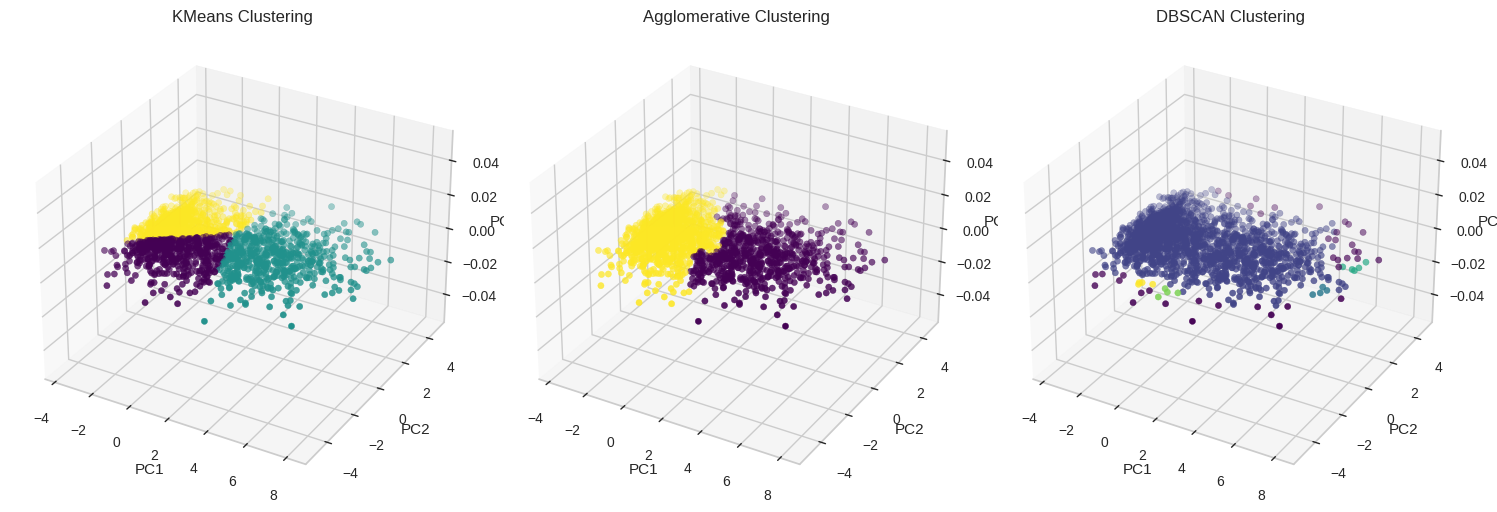

KMeans Silhouette Score: 0.37419320407038503
Agglomerative Clustering Silhouette Score: 0.5163926020519609


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
import numpy as np

# Create figure for 3D scatter plots
fig = plt.figure(figsize=(15, 5))

# KMeans plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(PCA_kmeans['col1'], PCA_kmeans['col2'],  c=PCA_kmeans['KMeans_Cluster'], cmap='viridis')
ax1.set_title('KMeans Clustering')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Agglomerative Clustering plot
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(PCA_agg['col1'], PCA_agg['col2'], c=PCA_agg['Agglomerative_Cluster'], cmap='viridis')
ax2.set_title('Agglomerative Clustering')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

# DBSCAN plot
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(PCA_dbscan['col1'], PCA_dbscan['col2'], c=PCA_dbscan['DBSCAN_Cluster'], cmap='viridis')
ax3.set_title('DBSCAN Clustering')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(PCA_kmeans[['col1', 'col2']], PCA_kmeans['KMeans_Cluster'])
hac_silhouette = silhouette_score(PCA_agg[['col1', 'col2']], PCA_agg['Agglomerative_Cluster'])

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {hac_silhouette}")


In [ ]:
df['Agglomerative_Cluster'] = PCA_agg['Agglomerative_Cluster']
print(df.head())

       Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    Ascore   Cscore  Impulsive       SS  Alcohol  Amphet  Amyl  Benzos  Caff  \
0 -0.91699 -0.00665   -0.21712 -1.18084        5       2     0       2     6   
1  0.76096 -0.14277   -0.71126 -0.21575        5       2     2       0     6   
2 -1.62090 -1.01450   -1.37983  0.40148        6       0     0       0     6   
3  0.59042  0.58489   -1.37983 -1.18084        4       0     0       3     5   
4 -0.30172  1.30612   -0.21712 -0.21575        4       1     1       0     6   

   Cannabis  Choc  Coke  Crack  

In [ ]:
print(df['Agglomerative_Cluster'].value_counts())

Agglomerative_Cluster
1    1191
0     686
Name: count, dtype: int64


<ipython-input-30-7d1136224bc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl2 = sns.countplot(x=df['Agglomerative_Cluster'], palette= pal)
<ipython-input-30-7d1136224bc4>:2: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  pl2 = sns.countplot(x=df['Agglomerative_Cluster'], palette= pal)


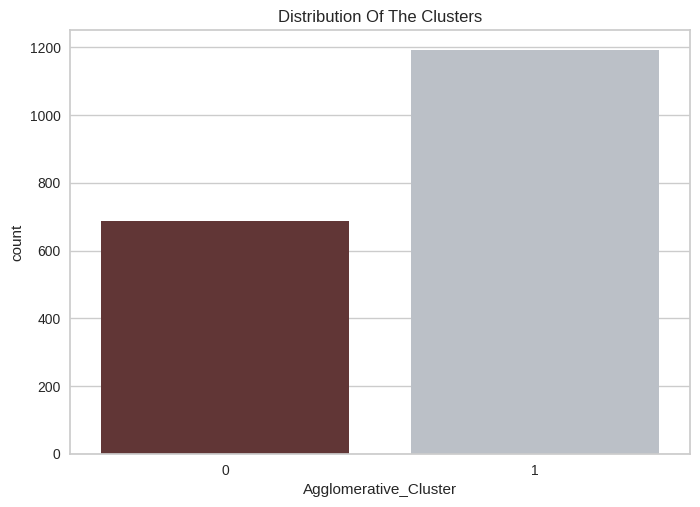

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl2 = sns.countplot(x=df['Agglomerative_Cluster'], palette= pal)
pl2.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
# Calculate the proportion (mean) of high_drug_use for each cluster
cluster_high_drug_use = df.groupby('Agglomerative_Cluster')['high_drug_use'].mean()
print(cluster_high_drug_use)

Agglomerative_Cluster
0    0.696793
1    0.001679
Name: high_drug_use, dtype: float64


In [ ]:
df['high_drug_use'].value_counts()

,count
high_drug_use,
0,1397
1,480


In [ ]:
# See detailed counts per cluster
cluster_drug_use_counts = df.groupby('Agglomerative_Cluster')['high_drug_use'].value_counts(normalize=True)
print(cluster_drug_use_counts)

Agglomerative_Cluster  high_drug_use
0                      1                0.696793
                       0                0.303207
1                      0                0.998321
                       1                0.001679
Name: proportion, dtype: float64


In [ ]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,legal_high,illicit_occ,composite_risk,high_drug_use,Agglomerative_Cluster
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,3,0,3,0,1
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,5,2,7,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,3,0,3,0,1
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,3,1,4,0,1
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,3,0,3,0,1


#Profiling found clusters with Agglomerative Algorithm        

<ipython-input-35-5d5bb82efad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature1, data=df[df['high_drug_use'] == 1], palette="Set3")


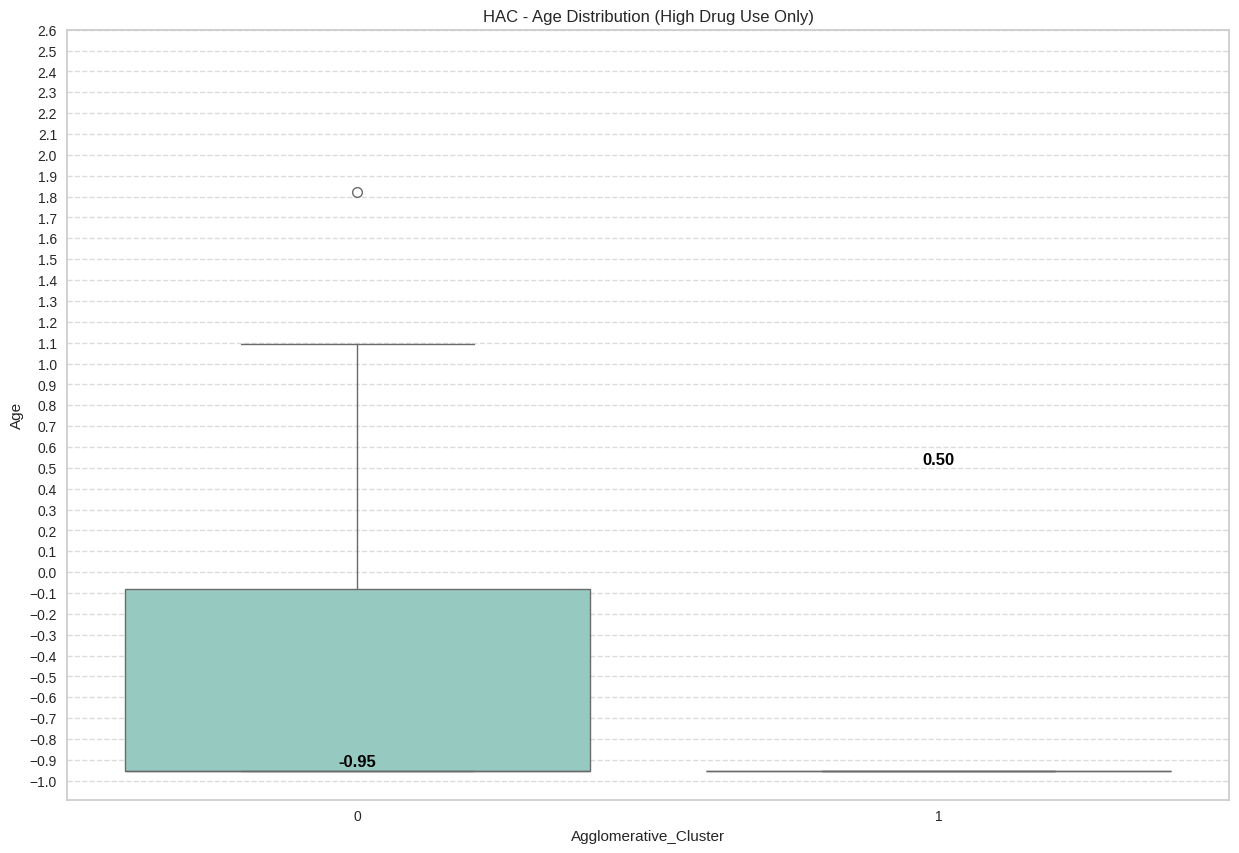

In [ ]:
feature1 = 'Age'

plt.figure(figsize=(15, 10))
sns.boxplot(x='Agglomerative_Cluster', y=feature1, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature1} Distribution (High Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature1].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Get min and max for Age to dynamically set y-axis ticks
age_min = df[feature1].min()
age_max = df[feature1].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(age_min, 1), round(age_max + 0.1, 1), 0.1))

# Add a horizontal grid (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-36-c9cd98aad405>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature1, data=df[df['high_drug_use'] == 0], palette="Set3")


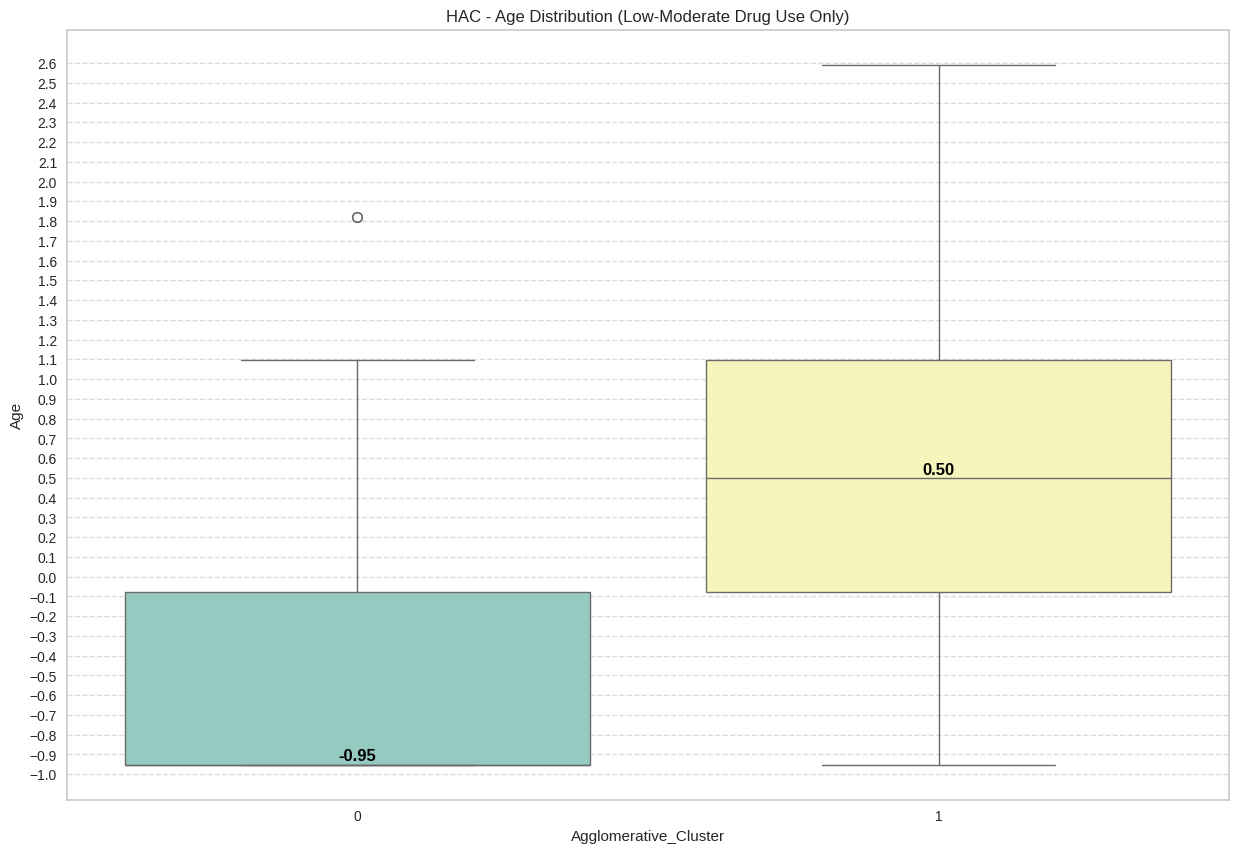

In [ ]:
feature1 = 'Age'

plt.figure(figsize=(15, 10))
sns.boxplot(x='Agglomerative_Cluster', y=feature1, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature1} Distribution (Low-Moderate Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature1].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Get min and max for Age to dynamically set y-axis ticks
age_min = df[feature1].min()
age_max = df[feature1].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(age_min, 1), round(age_max + 0.1, 1), 0.1))

# Add a horizontal grid (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Across all clusters, the general trend is:
1. High Drug users:
        *   Cluster 0 - consistently ranges mostly from ages 18 - 34 (Young Adults)
        *   Cluster 1 - not easily visible in the graph due to its scale.

2. Low - Moderate Drug users:
        *   Cluster 0 - consistently ranges mostly from ages 18 - 34 (Young Adults)
        *   Cluster 1 - consistently ranges mostly from ages 25 - 54 (Prime Working Age Adults)

This distribution highlights how age serves as a key factor in distinguishing high risk from low moderate drug users, demonstrating that demographic profiling, particularly age is integral to understanding drug consumption behavior.

**Trend points:**


*   -0.95197 	(18yrs - 24yrs old)
*   -0.07854 	(25yrs - 34yrs old)
*   0.49788   (35yrs - 44yrs old)
*   1.09449 	(45yrs - 54yrs old)

<ipython-input-37-a6816de38faf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature2, data=df[df['high_drug_use'] == 1], palette="Set3")


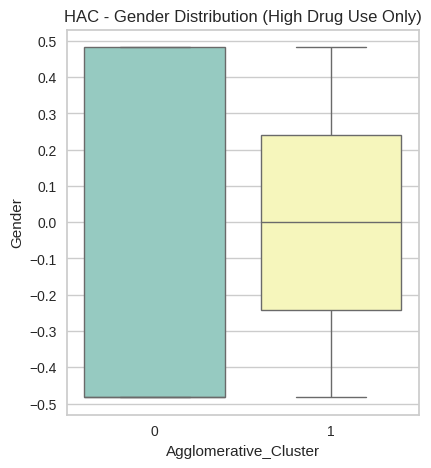

In [ ]:
feature2 = 'Gender'

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature2, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature2} Distribution (High Drug Use Only)")

# Get min and max for Age to dynamically set y-axis ticks
gender_min = df[feature2].min()
gender_max = df[feature2].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(gender_min, 1), round(gender_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-38-874e63f5d171>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature2, data=df[df['high_drug_use'] == 0], palette="Set3")


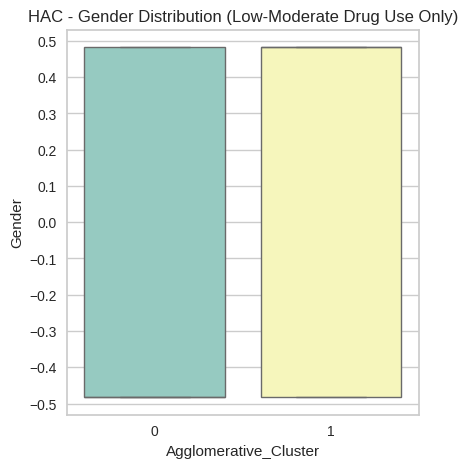

In [ ]:
feature2 = 'Gender'

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature2, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature2} Distribution (Low-Moderate Drug Use Only)")

# Get min and max for Age to dynamically set y-axis ticks
gender_min = df[feature2].min()
gender_max = df[feature2].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(gender_min, 1), round(gender_max + 0.1, 1), 0.1))

plt.show()

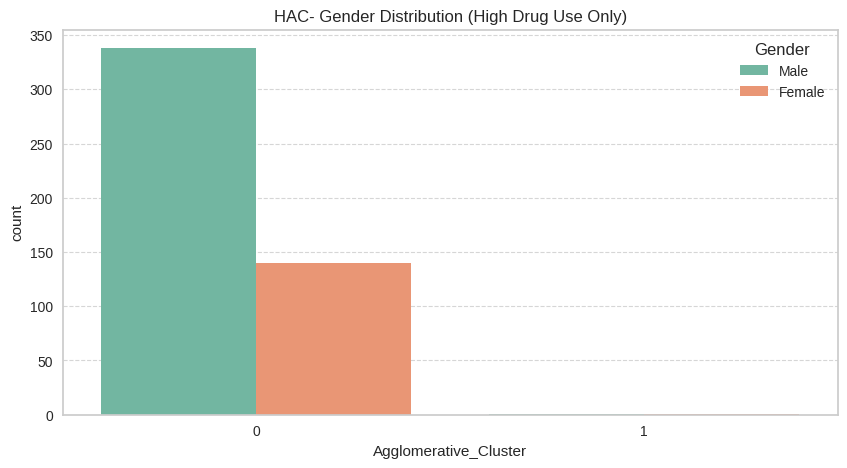

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Agglomerative_Cluster', hue='Gender', data=df[df['high_drug_use'] == 1], palette="Set2")
plt.title(f"HAC- Gender Distribution (High Drug Use Only)")

# Add legend
plt.legend(title="Gender", labels=["Male", "Female"])

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.8, linewidth=0.8)

plt.show()

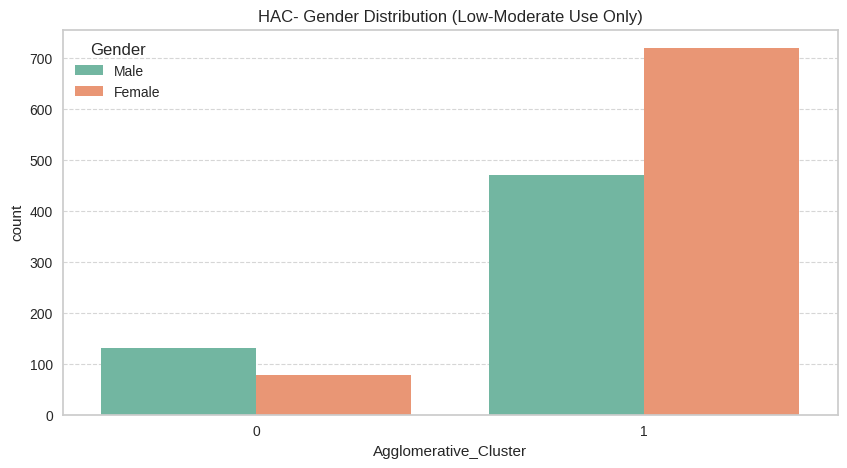

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Agglomerative_Cluster', hue='Gender', data=df[df['high_drug_use'] == 0], palette="Set2")
plt.title(f"HAC- Gender Distribution (Low-Moderate Use Only)")

# Add legend
plt.legend(title="Gender", labels=["Male", "Female"])

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.8, linewidth=0.8)

plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table that cross-tabulates 'Gender' and 'Agglomerative_Cluster'
# - Rows: Different categories of Gender (e.g., Male, Female)
# - Columns: Different clusters from Agglomerative Clustering (e.g., Cluster 0, Cluster 1)
contingency_table = pd.crosstab(df['Gender'], df['Agglomerative_Cluster'])

# Perform the Chi-Square Test of Independence
# This test checks whether there is a significant association between Gender and Cluster membership.
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# chi2: The Chi-square statistic value, indicating the magnitude of difference between observed and expected counts.
# p_value: The probability of obtaining a Chi-square statistic at least as extreme as the one observed, assuming independence.
# dof: Degrees of freedom, calculated as (number of rows - 1) * (number of columns - 1).
# expected: The expected frequencies for each cell in the contingency table if there were no association.

# Print the results to see the test output
print("Chi-square Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 143.47440216575706
p-value: 4.6292038484741464e-33
Degrees of Freedom: 1
Expected Frequencies:
 [[343.54821524 596.45178476]
 [342.45178476 594.54821524]]


Across all clusters, the general trend is:
1. High Drug users:
        *   Cluster 0 - has predominantly males.
        *   Cluster 1 - not easily visible in the graph due to its scale.

2. Low - Moderate Drug users:
        *   Cluster 0 - has predominantly males, but low count of people involved.
        *   Cluster 1 - has predominantly females.

This pattern suggests that men are more likely to fall into high drug use, and women are more prevalent in low moderate use. This demographic distinction, highlighting the importance of gender profiling in understanding drug consumption behavior.

**Trend points:**


*   0.48246 	Female
*   -0.48246 	Male

<ipython-input-42-1e48a0c73705>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature3, data=df[df['high_drug_use'] == 1], palette="Set3")


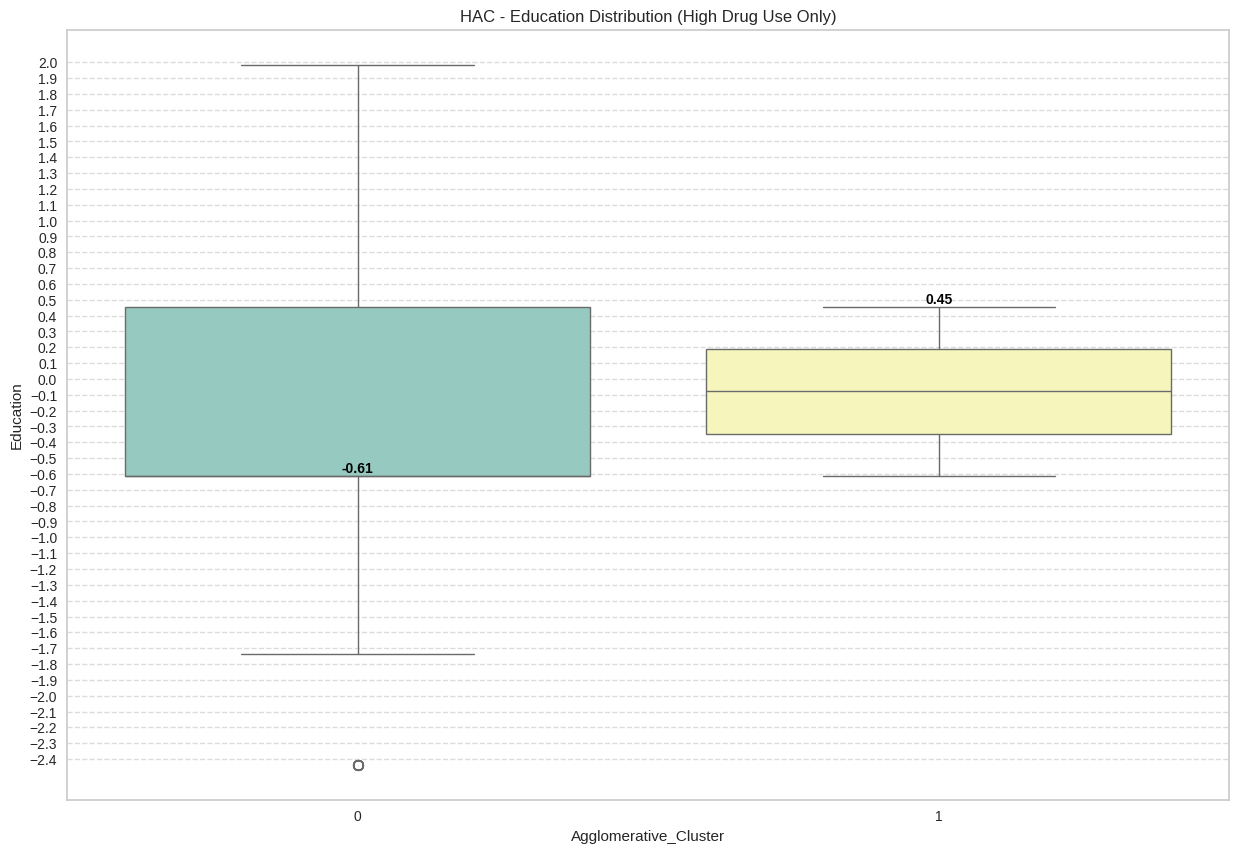

In [ ]:
feature3 = 'Education'

plt.figure(figsize=(15, 10))
# plt.subplot(1, 2, 2)  # Remove if using the entire figure
sns.boxplot(x='Agglomerative_Cluster', y=feature3, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature3} Distribution (High Drug Use Only)")

# Calculate and add median values (optional)
medians = df.groupby('Agglomerative_Cluster')[feature3].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='semibold')

# Get min and max for dynamic y-axis ticks
education_min = df[feature3].min()
education_max = df[feature3].max()

# Generate y-ticks with desired step size
plt.yticks(np.arange(round(education_min, 1), round(education_max + 0.1, 1), 0.1))

# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-43-749253ade8b0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature3, data=df[df['high_drug_use'] == 0], palette="Set3")


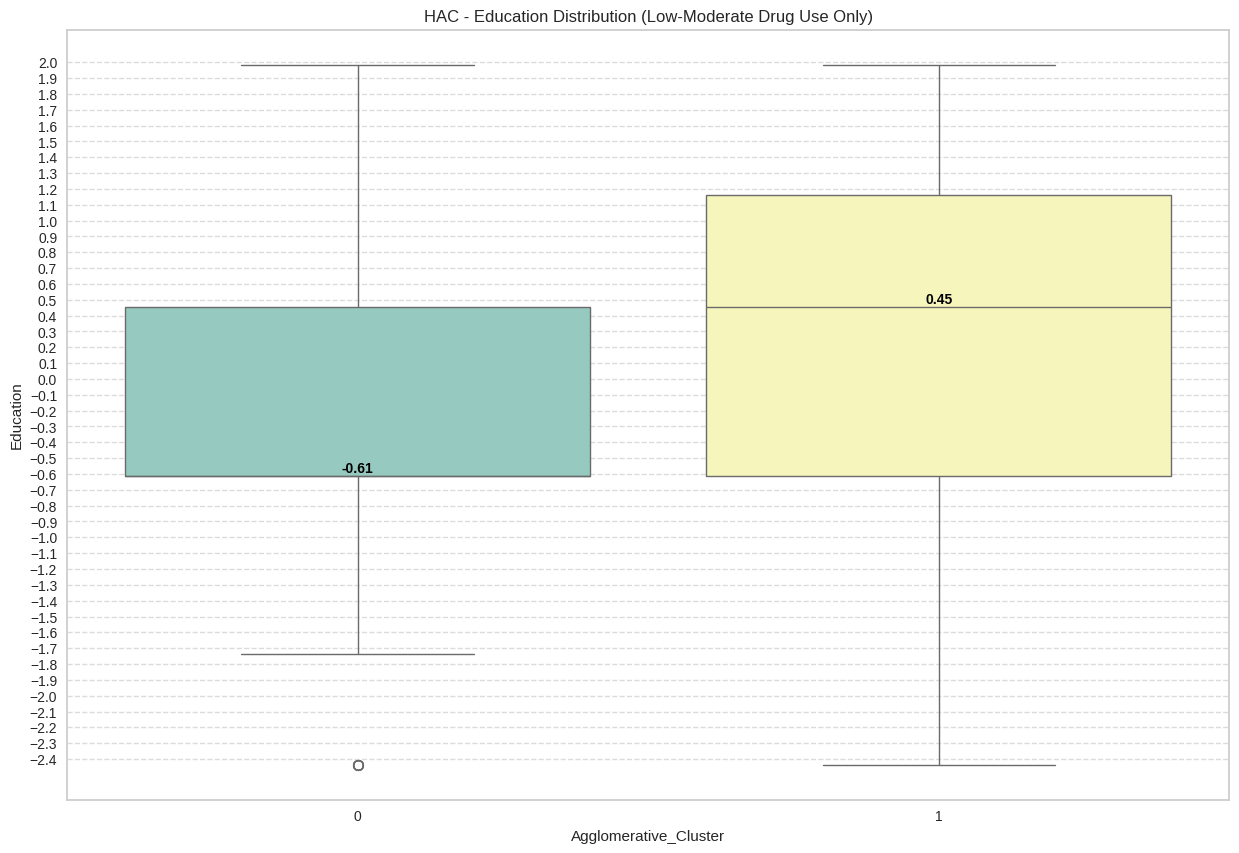

In [ ]:
feature3 = 'Education'

plt.figure(figsize=(15, 10))
# plt.subplot(1, 2, 2)  # Remove if using the entire figure
sns.boxplot(x='Agglomerative_Cluster', y=feature3, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature3} Distribution (Low-Moderate Drug Use Only)")

# Calculate and add median values (optional)
medians = df.groupby('Agglomerative_Cluster')[feature3].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='semibold')

# Get min and max for dynamic y-axis ticks
education_min = df[feature3].min()
education_max = df[feature3].max()

# Generate y-ticks with desired step size
plt.yticks(np.arange(round(education_min, 1), round(education_max + 0.1, 1), 0.1))

# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Across all clusters, the general trend is:
1. High Drug users:
        *   Cluster 0 - who have attained, university degree, professional certificate/diploma, and some college, no certificate or degree.
        *   Cluster 1 - who have attained Professional Certificate/Diploma.

2. Low - Moderate Drug users:
        *   Cluster 0 - who have attained, university degree, professional certificate/diploma, and some college, no certificate or degree.
        *   Cluster 1 - who have attained masters degree, university degree, professional certificate/diploma, and some college, no certificate or degree.

In the high drug use subset, Cluster 0 predominantly includes individuals with a university degree, a professional certificate or diploma, or some college experience, while Cluster 1 tends to include those holding a professional certificate or diploma. In the low–moderate group, Cluster 0 shows similar educational levels, but Cluster 1 spans a broader range, including master’s degrees. Although advanced education appears slightly more common in the low–moderate cluster, the analysis did not reveal a strong or clear difference in educational attainment between the two groups.

**Trend points:**


*   1.16365 	Masters Degree
*   0.45468 	University Degree
*   -0.05921	Professional Certificate/ Diploma
*   -0.61113 	Some College, No Certificate Or Degree




<ipython-input-44-ef9da3b28b10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature4, data=df, palette="Set3")


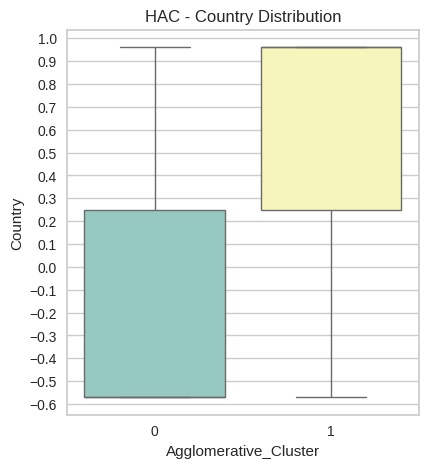

In [ ]:
feature4 = 'Country'

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature4, data=df, palette="Set3")
plt.title(f"HAC - {feature4} Distribution")

# Get min and max for Age to dynamically set y-axis ticks
country_min = df[feature4].min()
country_max = df[feature4].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(country_min, 1), round(country_max + 0.1, 1), 0.1))

plt.show()

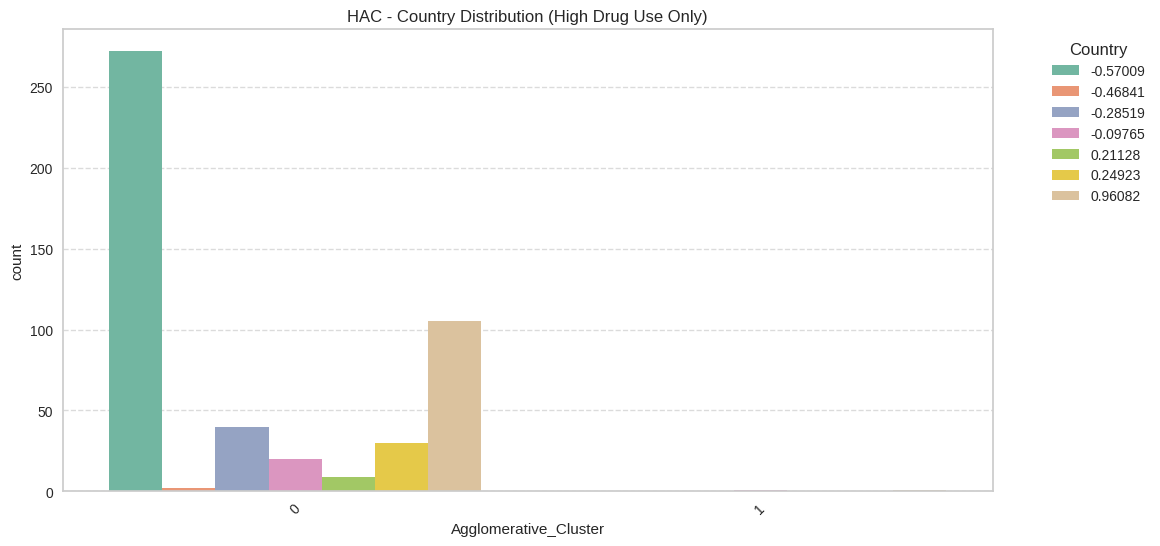

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Agglomerative_Cluster', hue='Country', data=df[df['high_drug_use'] == 1], palette="Set2")
plt.title(f"HAC - Country Distribution (High Drug Use Only)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

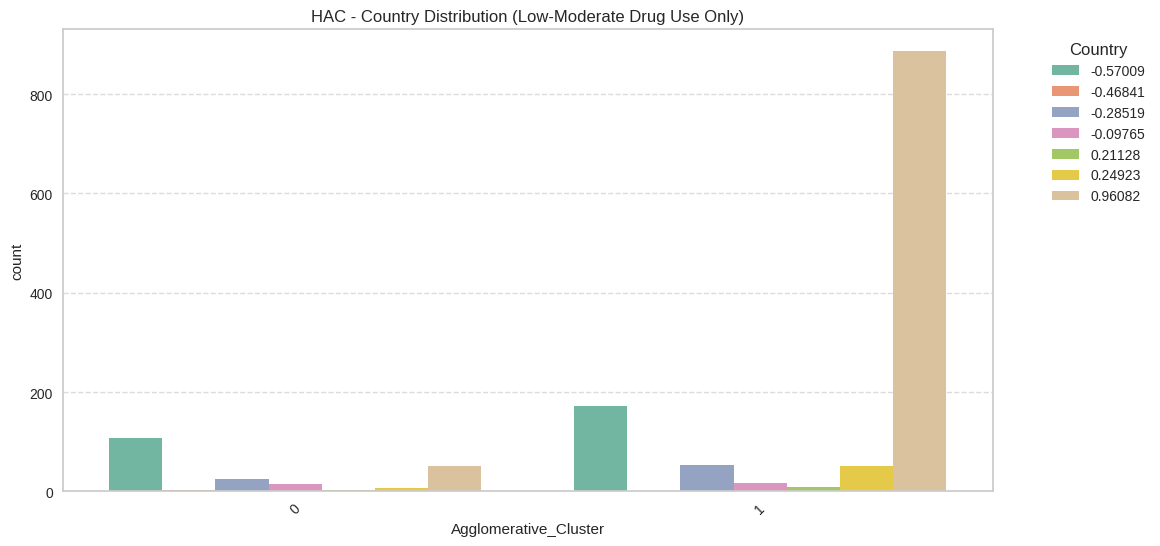

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Agglomerative_Cluster', hue='Country', data=df[df['high_drug_use'] == 0], palette="Set2")
plt.title(f"HAC - Country Distribution (Low-Moderate Drug Use Only)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

High Drug users mostly found from USA.

Overall, the dataset is dominated by participants from the UK (about 55%), followed by the USA (about 30%), with smaller representations from Australia, Canada, New Zealand, the Republic of Ireland, and others. In the high drug use subset, Cluster 0 appears to include more participants from the USA, while Cluster 1 includes fewer respondents overall. In the low–moderate subset, Cluster 1 is heavily composed of UK participants, whereas Cluster 0 features a mix of countries at lower counts. Although the UK and USA comprise the largest shares in both categories, these figures alone do not establish a strong correlation between country and drug use level. Further statistical analysis would be needed to determine whether nationality significantly influences drug consumption patterns.
  
  Value/ Country/ Size within the dataset
- -0.09765 	Australia 2.86%
- 0.24923 	Canada 4.62%
- -0.46841 	New Zealand 	0.27%
- -0.28519 	Other 6.26%
- 0.21128 	Republic of Ireland 1.06%
- 0.96082 	UK 	55.38%
- -0.57009 	USA 29.55%


<ipython-input-47-a84a138e6ff0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature5, data=df, palette="Set3")


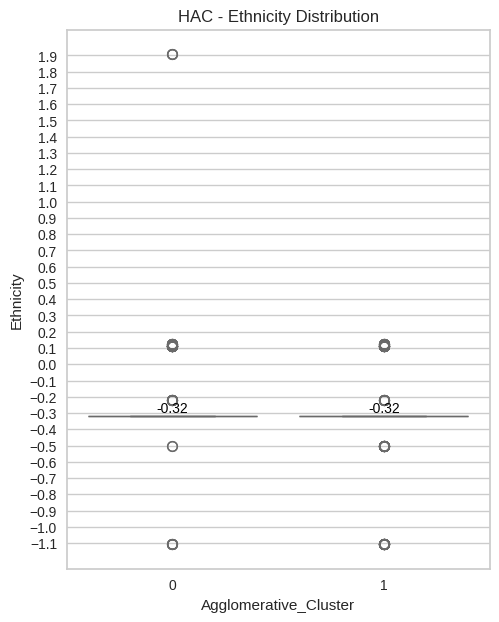

In [ ]:
feature5 = 'Ethnicity'

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature5, data=df, palette="Set3")
plt.title(f"HAC - {feature5} Distribution")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature5].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ethnicity_min = df[feature5].min()
ethnicity_max = df[feature5].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ethnicity_min, 1), round(ethnicity_max + 0.1, 1), 0.1))

plt.show()

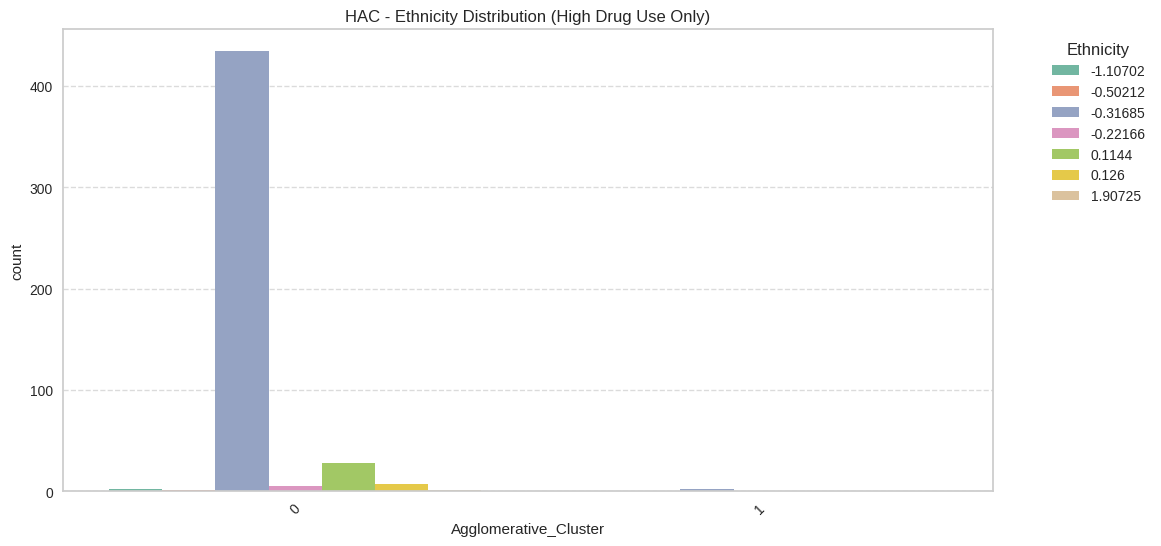

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Agglomerative_Cluster', hue='Ethnicity', data=df[df['high_drug_use'] == 1], palette="Set2")
plt.title(f"HAC - Ethnicity Distribution (High Drug Use Only)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


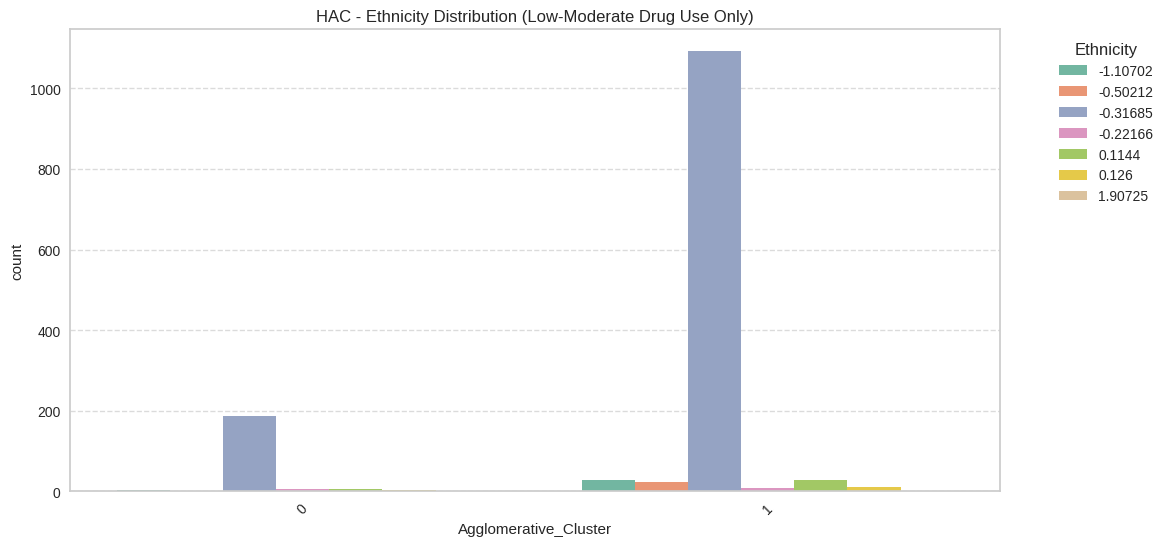

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Agglomerative_Cluster', hue='Ethnicity', data=df[df['high_drug_use'] == 0], palette="Set2")
plt.title(f"HAC - Ethnicity Distribution (Low-Moderate Drug Use Only)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Across all clusters, the general trend is:
1. High Drug users:
        *   Cluster 0 - top users are white people.
        *   Cluster 1 - not easily visible in the graph due to its scale.

2. Low - Moderate Drug users:
        *   Cluster 0 - top users are white people.
        *   Cluster 1 - top users are white people.

White participants dominate the dataset, comprising about 91.25% of all respondents. Consequently, both high-drug-use (Cluster 0 in the first plot) and low-to-moderate-use clusters (Cluster 0 and 1 in the second plot) are primarily composed of White individuals. While other ethnic groups (e.g., Asian, Black, and mixed categories) are present, their smaller representation is less visible in the figures. These results indicate that, within this dataset, the White majority largely defines the clustering patterns for drug consumption, highlighting a potential sampling imbalance and the need for caution when generalizing findings to more diverse populations.


**Trend points:**


  Value/ Country/ Size within the dataset
- -0.50212	- Asian
- -1.10702	- Black
- 1.90725	- Mixed-Black/Asian
- 0.12600	- Mixed-White/Asian
- -0.22166	- Mixed-White/Black
- 0.11440	- Other
- -0.31685	- White

Dataset is highly represented by White given the range of -0.31685 or 1720, 	91.25% of the whole dataset

<ipython-input-50-9b090587a9e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature6, data=df, palette="Set3")


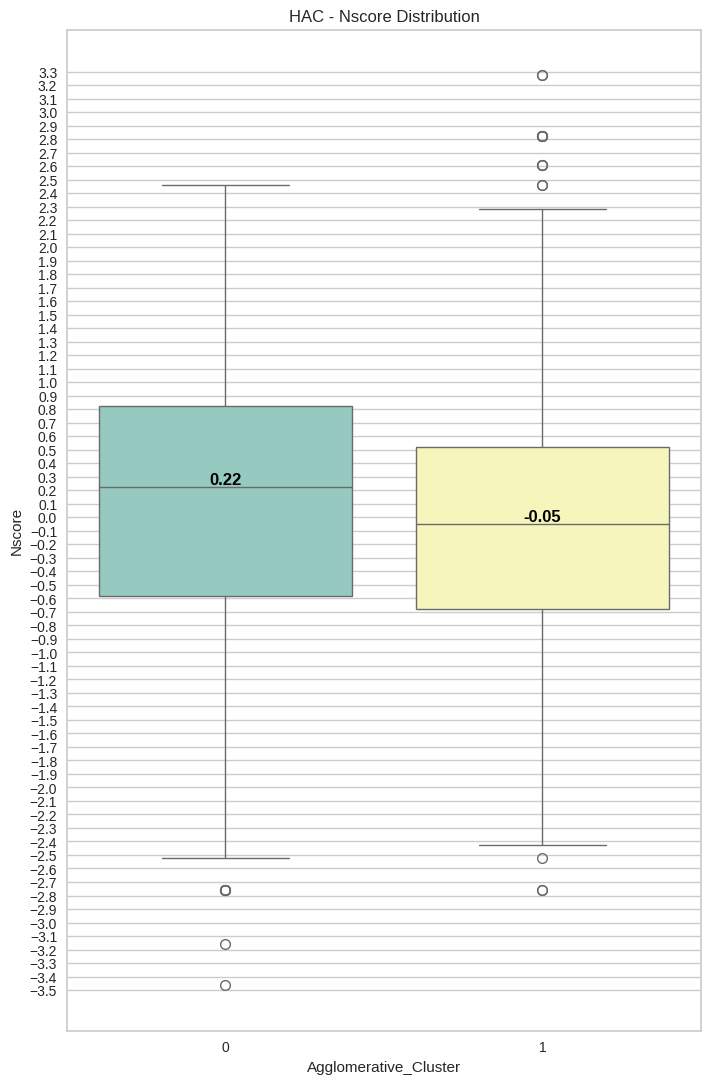

In [ ]:
feature6 = 'Nscore'

plt.figure(figsize=(18, 13))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature6, data=df, palette="Set3")
plt.title(f"HAC - {feature6} Distribution")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature6].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Get min and max for Age to dynamically set y-axis ticks
nscore_min = df[feature6].min()
nscore_max = df[feature6].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(nscore_min, 1), round(nscore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-51-7753370db8ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature6, data=df[df['high_drug_use'] == 1], palette="Set3")


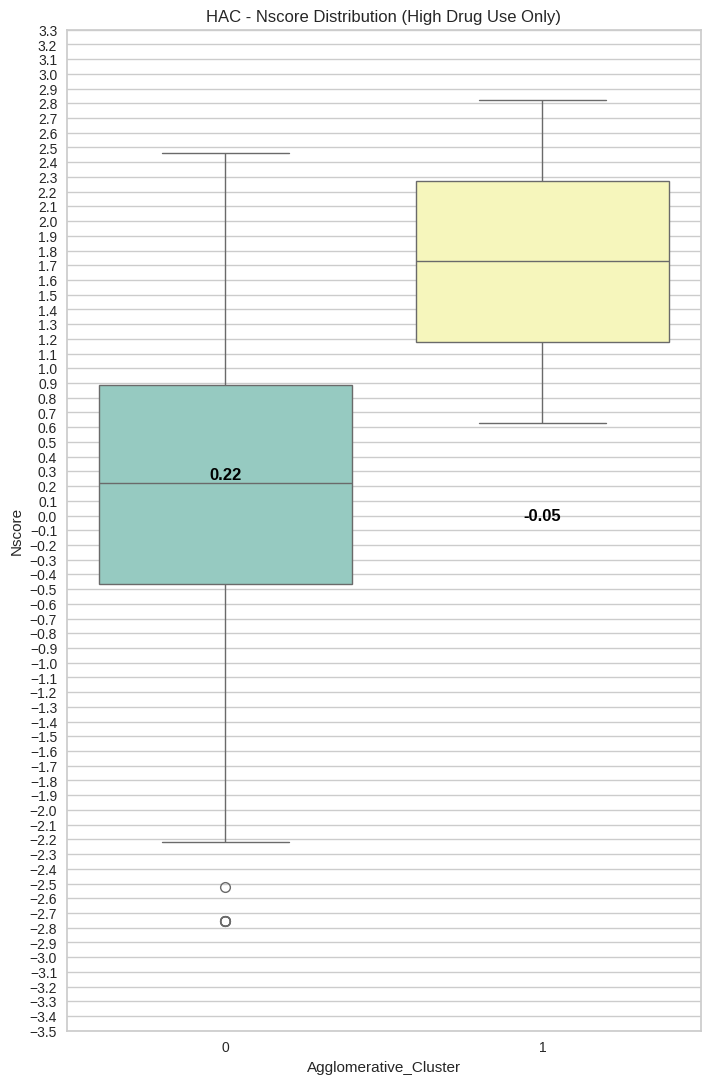

In [ ]:
feature6 = 'Nscore'

plt.figure(figsize=(18, 13))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature6, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature6} Distribution (High Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature6].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Get min and max for Age to dynamically set y-axis ticks
nscore_min = df[feature6].min()
nscore_max = df[feature6].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(nscore_min, 1), round(nscore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-52-d0618ea8b92d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature6, data=df[df['high_drug_use'] == 0], palette="Set3")


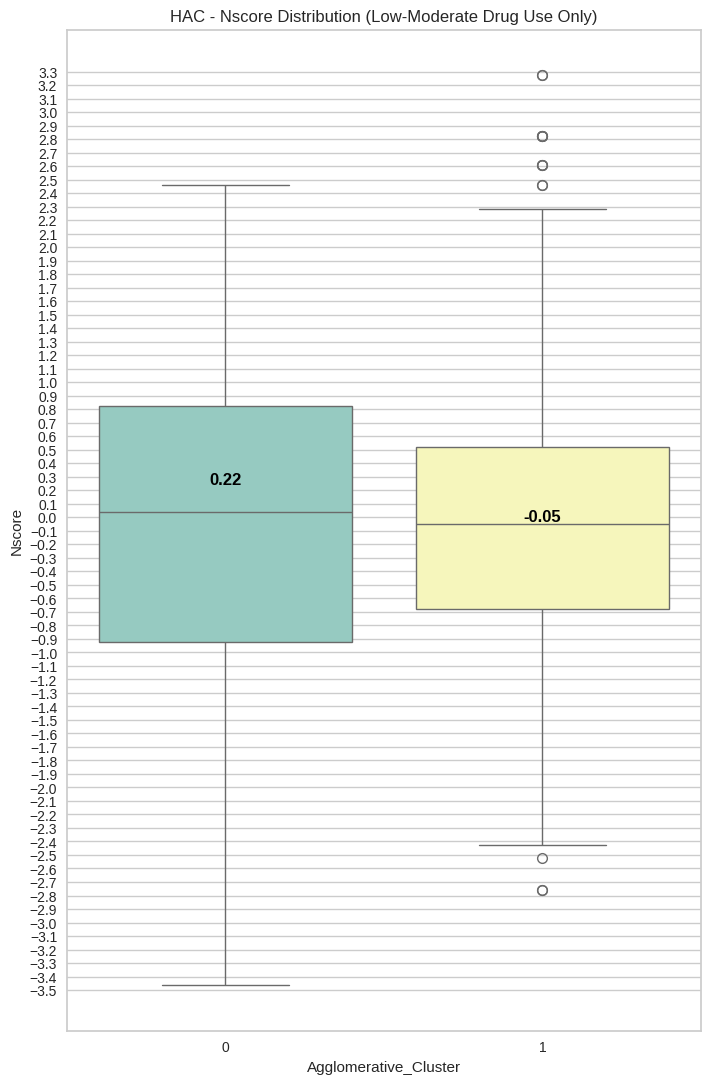

In [ ]:
feature6 = 'Nscore'

plt.figure(figsize=(18, 13))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature6, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature6} Distribution (Low-Moderate Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature6].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Get min and max for Age to dynamically set y-axis ticks
nscore_min = df[feature6].min()
nscore_max = df[feature6].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(nscore_min, 1), round(nscore_max + 0.1, 1), 0.1))

plt.show()

Across all clusters, the general trend is:
1. High Drug users:
        *   Cluster 0 - NScore: 30-45
        *   Cluster 1 - NScore: 47-56

2. Low - Moderate Drug users:
        *   Cluster 0 - NScore:  27-44
        *   Cluster 1 - NScore: 28-41

One group had moderately elevated Neuroticism scores ranging from 30 to 45, while another group had significantly higher scores between 47 and 56. This pattern suggests that individuals with the highest scores may be more emotionally reactive and potentially more vulnerable to stress, which could drive their heavier substance use. In contrast, low and moderate drug users showed more overlap in their scores, with one group ranging from 27 to 44 and the other from 28 to 41. This indicates that factors beyond Neuroticism, such as social influences or other personality traits, may play a larger role in their drug use patterns

<ipython-input-53-49fd732e3a4f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature7, data=df, palette="Set3")


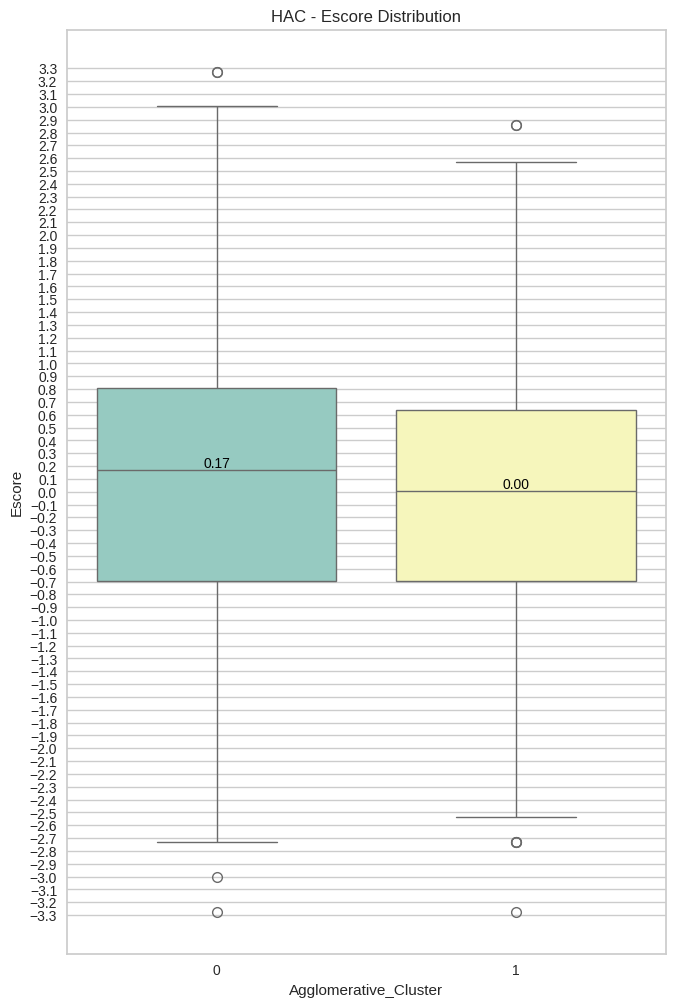

In [ ]:
feature7 = 'Escore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature7, data=df, palette="Set3")
plt.title(f"HAC - {feature7} Distribution")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature7].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
escore_min = df[feature7].min()
escore_max = df[feature7].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(escore_min, 1), round(escore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-54-01cb83e1d3b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature7, data=df[df['high_drug_use'] == 1], palette="Set3")


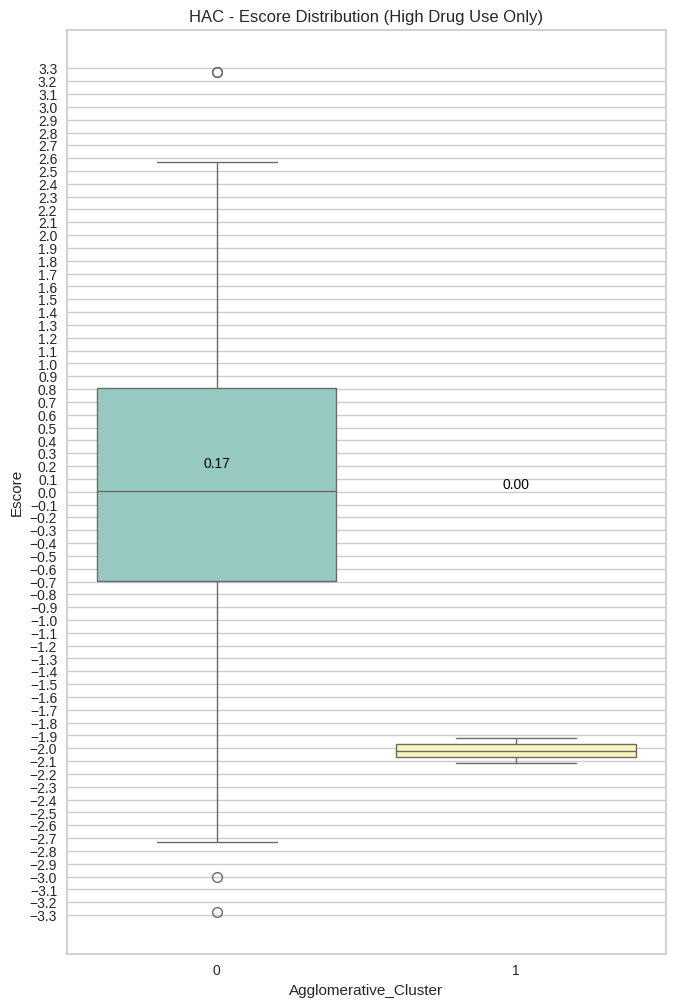

In [ ]:
feature7 = 'Escore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature7, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature7} Distribution (High Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature7].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
escore_min = df[feature7].min()
escore_max = df[feature7].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(escore_min, 1), round(escore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-55-c0d5a84b3493>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature7, data=df[df['high_drug_use'] == 0], palette="Set3")


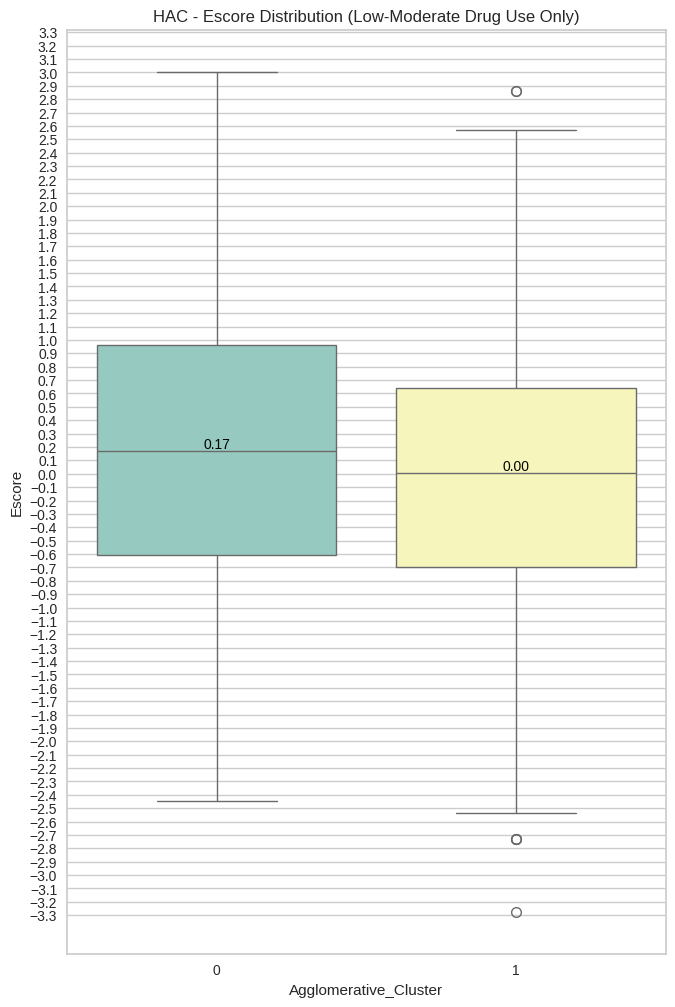

In [ ]:
feature7 = 'Escore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature7, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature7} Distribution (Low-Moderate Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature7].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
escore_min = df[feature7].min()
escore_max = df[feature7].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(escore_min, 1), round(escore_max + 0.1, 1), 0.1))

plt.show()

Across all clusters, the general trend is:
1. High Drug users:
        *   Cluster 0 - EScore: 35-45
        *   Cluster 1 - EScore: 24-25

2. Low - Moderate Drug users:
        *   Cluster 0 - EScore:  35-46
        *   Cluster 1 - EScore: 35-44

Two distinct subgroups emerged based on extraversion: one group showed moderate to high scores (35 to 45), while the other had noticeably lower scores (24 to 25). This suggests that some heavy users may be more outgoing and socially engaged, while others are more reserved. Among low to moderate drug users, both clusters exhibited similar extraversion ranges (35 to 46 and 35 to 44), indicating that extraversion may not be the primary factor distinguishing their usage patterns. Instead, other personality traits or contextual influences could be more important in explaining their substance use behaviors.


<ipython-input-56-1c7daef7fdb9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature8, data=df, palette="Set3")


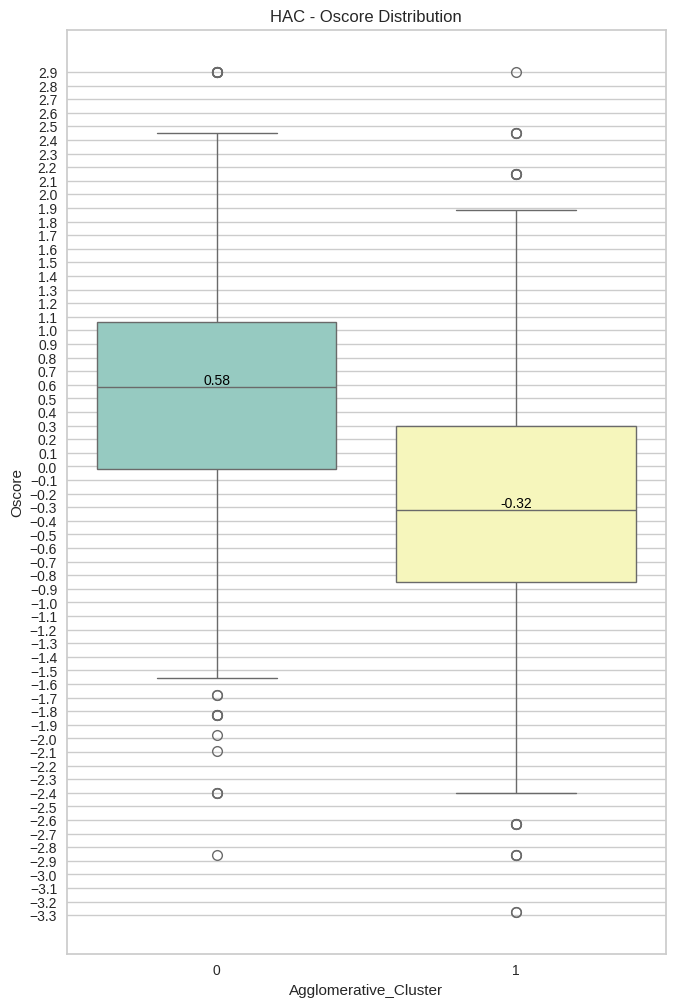

In [ ]:
feature8 = 'Oscore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature8, data=df, palette="Set3")
plt.title(f"HAC - {feature8} Distribution")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature8].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
oscore_min = df[feature8].min()
oscore_max = df[feature8].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(oscore_min, 1), round(oscore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-57-2e1ee17d0214>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature8, data=df[df['high_drug_use'] == 1], palette="Set3")


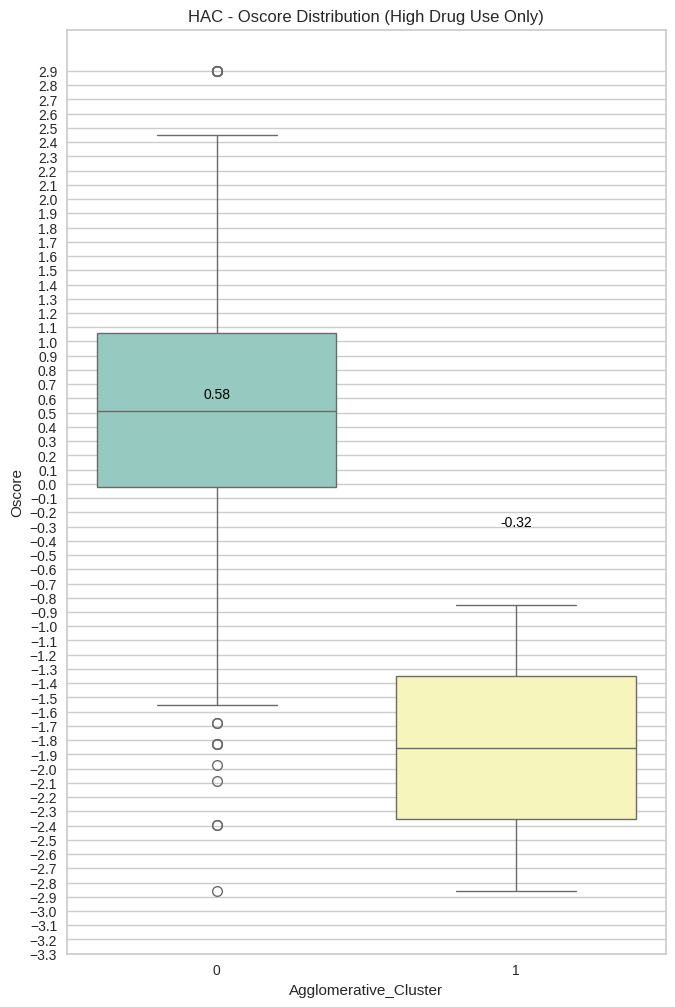

In [ ]:
feature8 = 'Oscore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature8, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature8} Distribution (High Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature8].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
oscore_min = df[feature8].min()
oscore_max = df[feature8].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(oscore_min, 1), round(oscore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-58-46c25c7124d7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature8, data=df[df['high_drug_use'] == 0], palette="Set3")


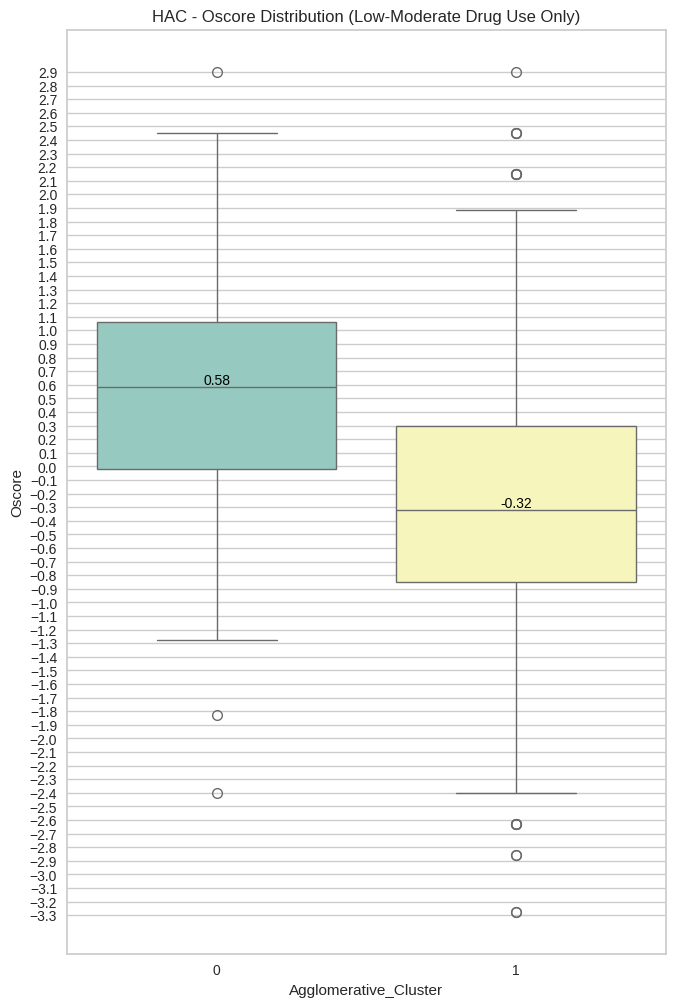

In [ ]:
feature8 = 'Oscore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature8, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature8} Distribution (Low-Moderate Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature8].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
oscore_min = df[feature8].min()
oscore_max = df[feature8].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(oscore_min, 1), round(oscore_max + 0.1, 1), 0.1))

plt.show()

Across all clusters, the general trend is:
1. High Drug users:
        *   Cluster 0 - OScore: 47-53
        *   Cluster 1 - OScore: 29-36

2. Low - Moderate Drug users:
        *   Cluster 0 - OScore: 47-53
        *   Cluster 1 - OScore: 40-48

One subgroup shows notably higher openness (OScore 47–53) compared to another with lower scores (29–36), suggesting that a significant portion of heavy users may be more curious, imaginative, or open to experiences, while others are less so. In contrast, low–moderate drug users both tend to have relatively high openness (47–53 versus 40–48), indicating a narrower gap between the two clusters. This pattern implies that among heavy users, openness may be a key personality factor distinguishing different usage behaviors, whereas in lower‐use groups, openness levels are more similar, and other influences likely play a larger role.



<ipython-input-59-d99d98c04a06>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature9, data=df, palette="Set3")


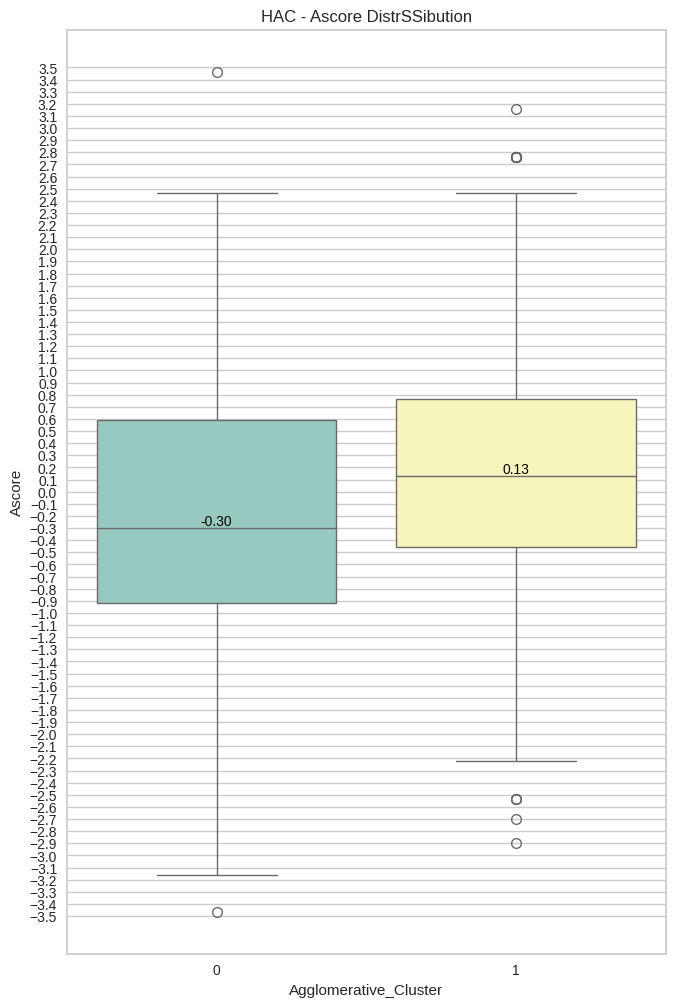

In [ ]:
feature9 = 'Ascore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature9, data=df, palette="Set3")
plt.title(f"HAC - {feature9} DistrSSibution")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature9].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ascore_min = df[feature9].min()
ascore_max = df[feature9].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ascore_min, 1), round(ascore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-60-de9dceb86e8b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature9, data=df[df['high_drug_use'] == 1], palette="Set3")


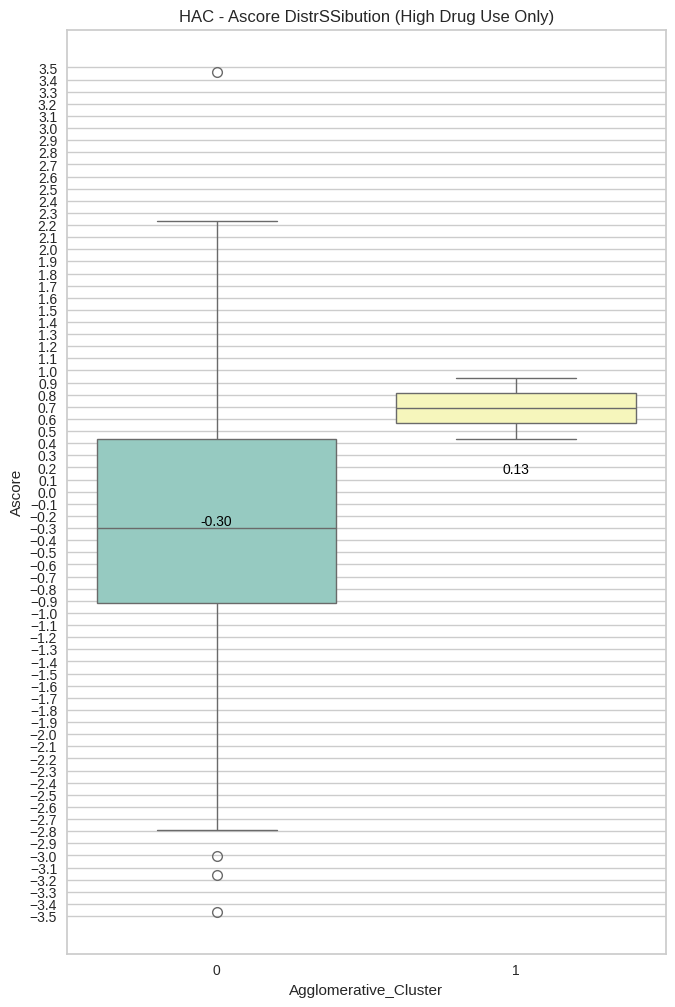

In [ ]:
feature9 = 'Ascore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature9, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature9} DistrSSibution (High Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature9].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ascore_min = df[feature9].min()
ascore_max = df[feature9].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ascore_min, 1), round(ascore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-61-e5ddf2ff454e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature9, data=df[df['high_drug_use'] == 0], palette="Set3")


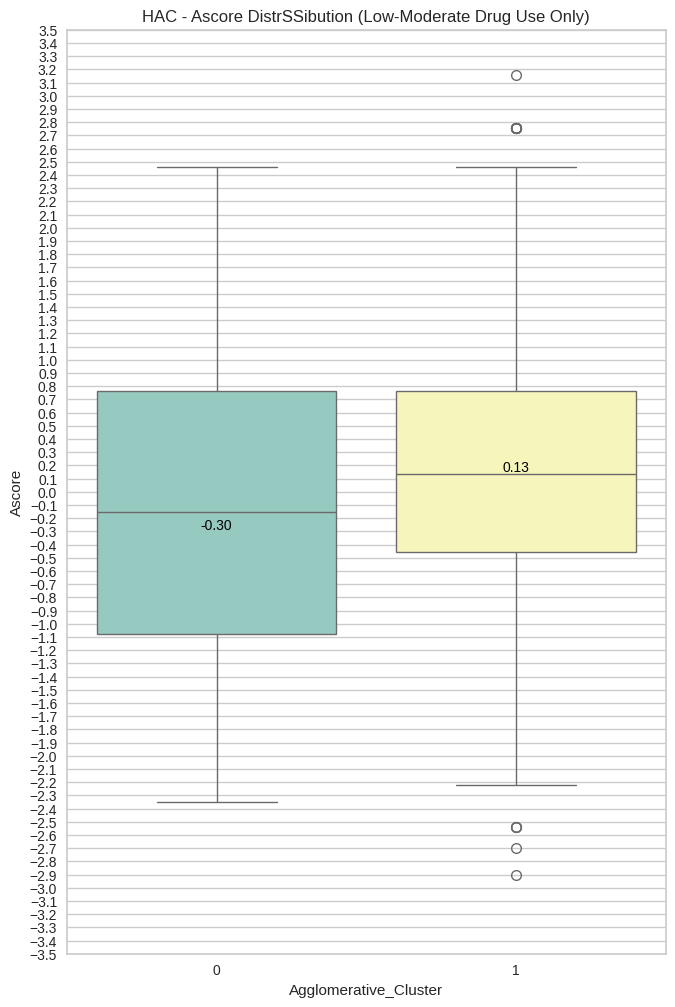

In [ ]:
feature9 = 'Ascore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature9, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature9} DistrSSibution (Low-Moderate Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature9].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ascore_min = df[feature9].min()
ascore_max = df[feature9].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ascore_min, 1), round(ascore_max + 0.1, 1), 0.1))

plt.show()

Across all clusters, the general trend is:
1. High Drug users:
        *   Cluster 0 - AScore: 37-46
        *   Cluster 1 - AScore: 47-48

2. Low - Moderate Drug users:
        *   Cluster 0 - AScore: 36-48
        *   Cluster 1 - AScore: 40-48

One subgroup shows moderate agreeableness scores (37–46), while the other has consistently higher scores (47–48), suggesting that some heavy users may be more cooperative and empathetic than others. In contrast, low–moderate users exhibit overlapping ranges (36–48 and 40–48), indicating that agreeableness is less likely to be the main factor distinguishing their usage patterns. Instead, other personality traits or situational factors may play a larger role in differentiating low–moderate drug users.


<ipython-input-62-ad66a8f6b41e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature10, data=df, palette="Set3")


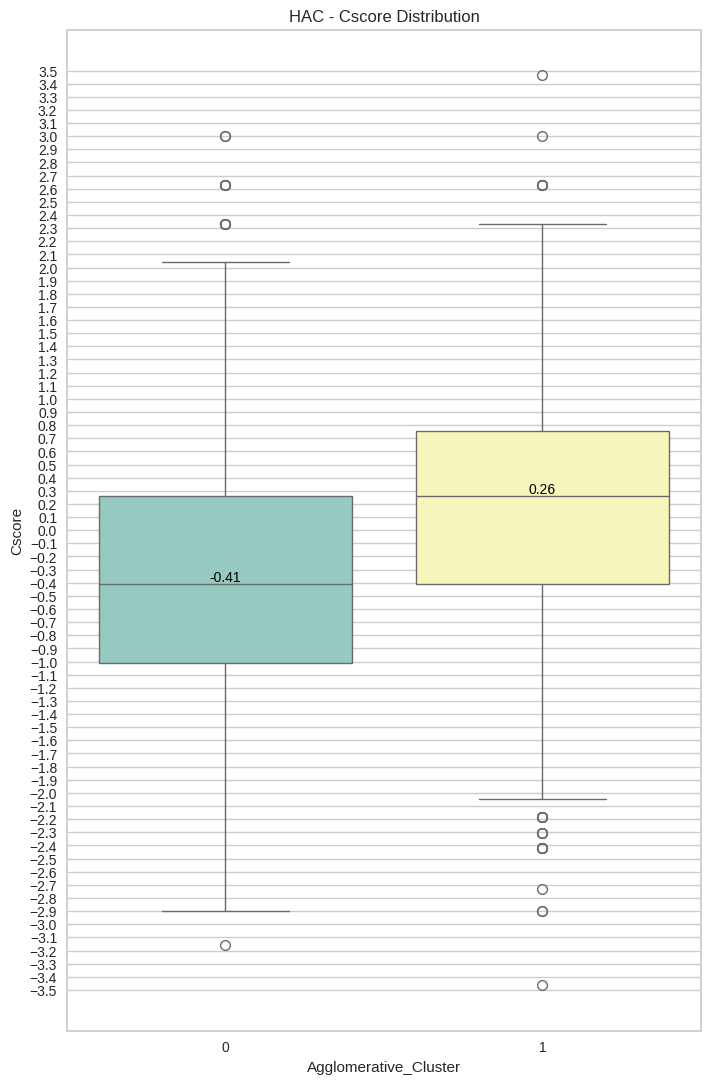

In [ ]:
feature10 = 'Cscore'

plt.figure(figsize=(18, 13))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature10, data=df, palette="Set3")
plt.title(f"HAC - {feature10} Distribution")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature10].median().values
# Get positions of the boxes
positions = range(len(medians))

# Annotate with median values
for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
cscore_min = df[feature10].min()
cscore_max = df[feature10].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(cscore_min, 1), round(cscore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-63-9f61c6f0ddbf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature10, data=df[df['high_drug_use'] == 1], palette="Set3")


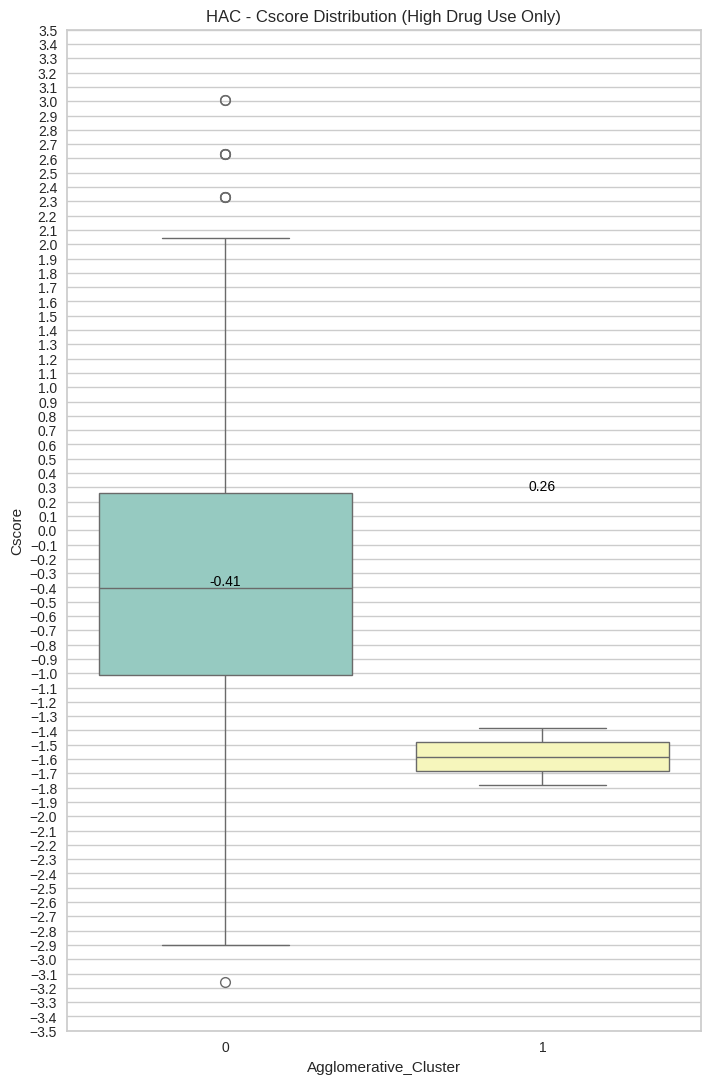

In [ ]:
feature10 = 'Cscore'

plt.figure(figsize=(18, 13))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature10, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature10} Distribution (High Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature10].median().values
# Get positions of the boxes
positions = range(len(medians))

# Annotate with median values
for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
cscore_min = df[feature10].min()
cscore_max = df[feature10].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(cscore_min, 1), round(cscore_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-64-3fa2c05dc50f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature10, data=df[df['high_drug_use'] == 0], palette="Set3")


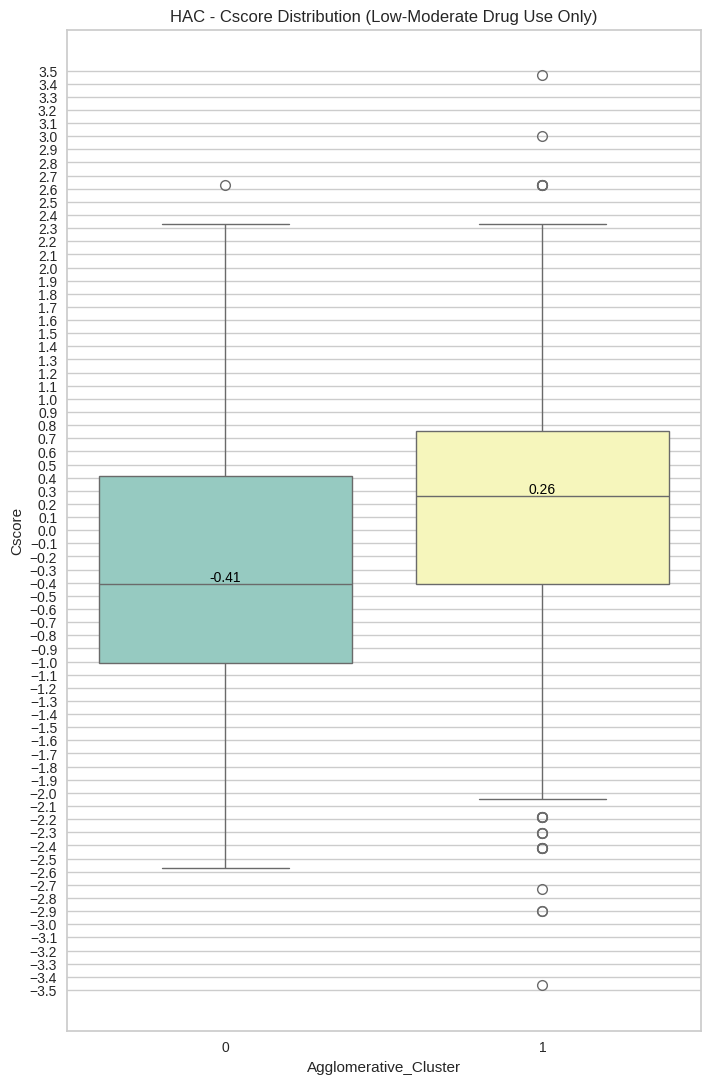

In [ ]:
feature10 = 'Cscore'

plt.figure(figsize=(18, 13))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature10, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature10} Distribution (Low-Moderate Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature10].median().values
# Get positions of the boxes
positions = range(len(medians))

# Annotate with median values
for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
cscore_min = df[feature10].min()
cscore_max = df[feature10].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(cscore_min, 1), round(cscore_max + 0.1, 1), 0.1))

plt.show()

Across all clusters, the general trend is:
1. High Drug users:
        *   Cluster 0 - CScore: 34-44
        *   Cluster 1 - CScore: 28-30

2. Low - Moderate Drug users:
        *   Cluster 0 - CScore: 34-45
        *   Cluster 1 - CScore: 39-47

One cluster shows moderate conscientiousness (34–44), while the other has notably lower scores (28–30), suggesting that individuals with less discipline and organization may be more prone to heavier substance use. By contrast, in the low–moderate user group, both clusters have moderate to higher conscientiousness (34–45 versus 39–47), indicating that this trait alone is less influential in explaining differences in their drug‐use patterns.



<ipython-input-65-ed3c2ae92269>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature11, data=df, palette="Set3")


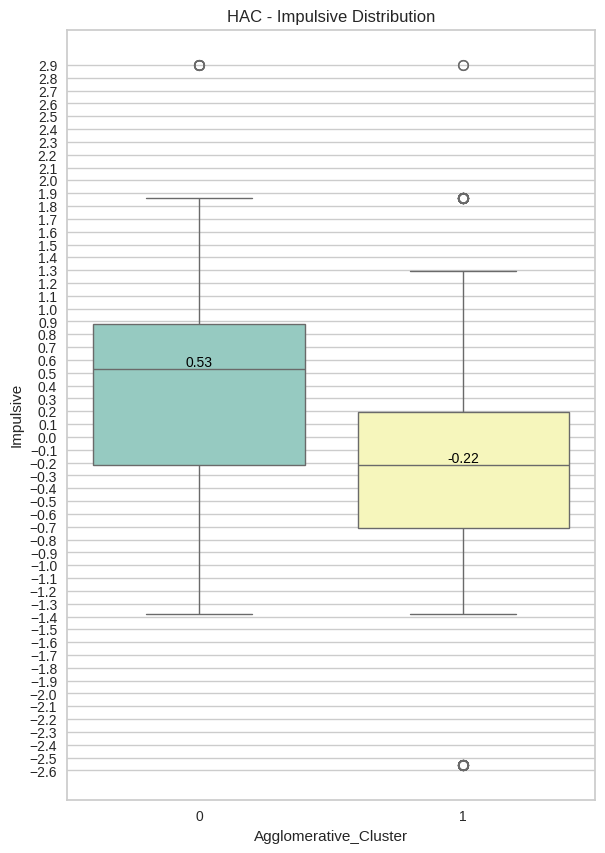

In [ ]:
feature11 = 'Impulsive'

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature11, data=df, palette="Set3")
plt.title(f"HAC - {feature11} Distribution")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature11].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
impulsive_min = df[feature11].min()
impulsive_max = df[feature11].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(impulsive_min, 1), round(impulsive_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-66-03987ea33e44>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature11, data=df[df['high_drug_use'] == 1], palette="Set3")


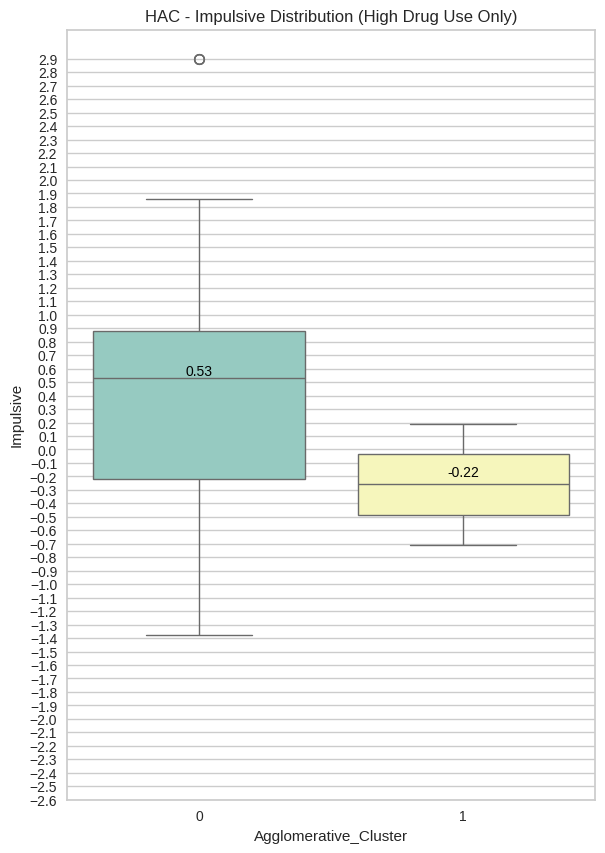

In [ ]:
feature11 = 'Impulsive'

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature11, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature11} Distribution (High Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature11].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
impulsive_min = df[feature11].min()
impulsive_max = df[feature11].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(impulsive_min, 1), round(impulsive_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-67-1df763fcfa4d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature11, data=df[df['high_drug_use'] == 0], palette="Set3")


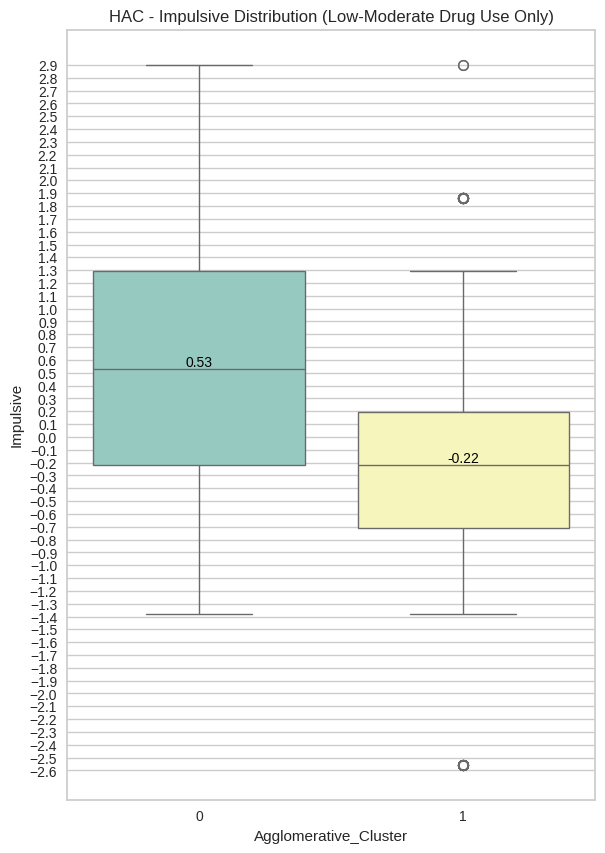

In [ ]:
feature11 = 'Impulsive'

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature11, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature11} Distribution (Low-Moderate Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature11].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
impulsive_min = df[feature11].min()
impulsive_max = df[feature11].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(impulsive_min, 1), round(impulsive_max + 0.1, 1), 0.1))

plt.show()

Among high drug users, Cluster 0 shows higher impulsivity (around 0.53) compared to Cluster 1 (around –0.22), suggesting that more impulsive tendencies may be linked to heavier substance use. A similar pattern appears among low to moderate users, with Cluster 0 again displaying higher impulsivity. The distribution table indicates that most individuals fall in the low‐to‐moderate impulsivity range, while a smaller fraction exhibit very high or very low impulsivity. Overall, these findings suggest that impulsiveness could play an important role in distinguishing heavier drug users from those with lower or more moderate use.

<ipython-input-68-212dc97106a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature12, data=df, palette="Set3")


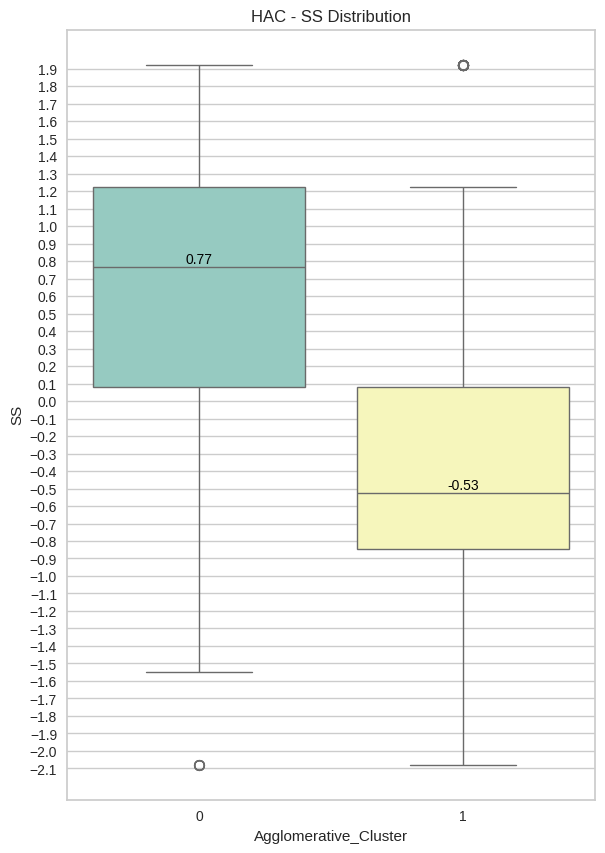

In [ ]:
feature12 = 'SS'

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature12, data=df, palette="Set3")
plt.title(f"HAC - {feature12} Distribution")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature12].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ss_min = df[feature12].min()
ss_max = df[feature12].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ss_min, 1), round(ss_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-69-046f82f42431>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature12, data=df[df['high_drug_use'] == 1], palette="Set3")


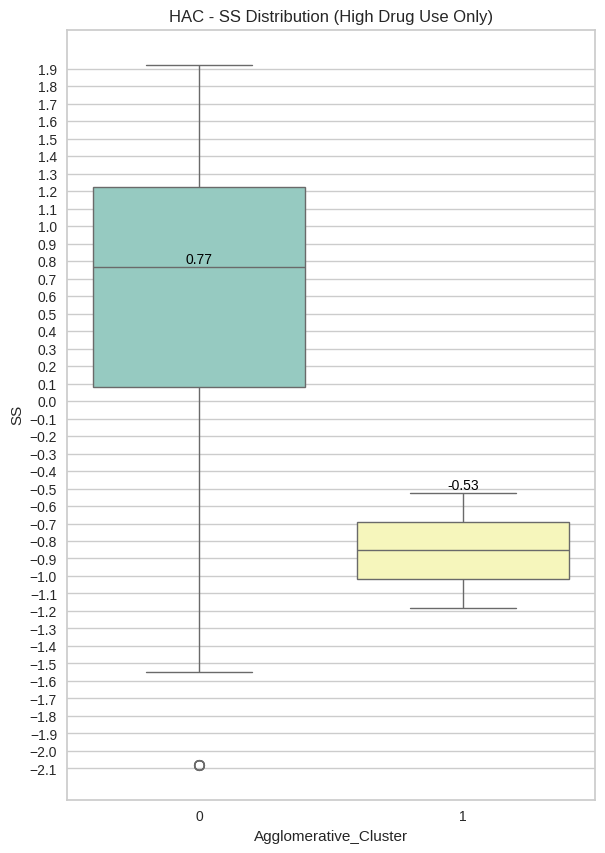

In [ ]:
feature12 = 'SS'

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature12, data=df[df['high_drug_use'] == 1], palette="Set3")
plt.title(f"HAC - {feature12} Distribution (High Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature12].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ss_min = df[feature12].min()
ss_max = df[feature12].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ss_min, 1), round(ss_max + 0.1, 1), 0.1))

plt.show()

<ipython-input-70-06e3cdaf022a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agglomerative_Cluster', y=feature12, data=df[df['high_drug_use'] == 0], palette="Set3")


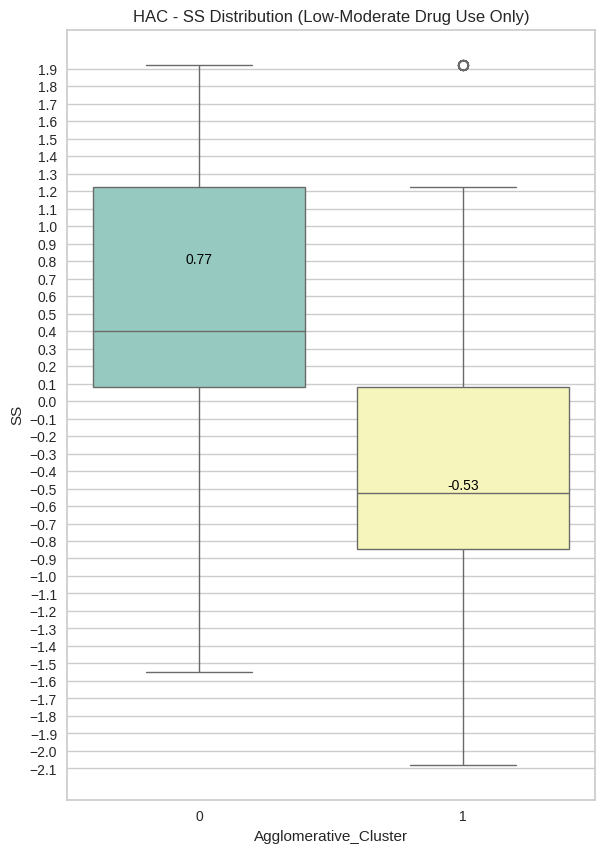

In [ ]:
feature12 = 'SS'

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agglomerative_Cluster', y=feature12, data=df[df['high_drug_use'] == 0], palette="Set3")
plt.title(f"HAC - {feature12} Distribution (Low-Moderate Drug Use Only)")

# Calculate and add median values
medians = df.groupby('Agglomerative_Cluster')[feature12].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ss_min = df[feature12].min()
ss_max = df[feature12].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ss_min, 1), round(ss_max + 0.1, 1), 0.1))

plt.show()

Among high drug users, one cluster exhibits higher sensation‐seeking (around 0.77), while the other is lower (around –0.53). A similar pattern appears in the low–moderate group, suggesting that those who crave novelty and excitement may be more prone to heavier substance use. The distribution table shows that most individuals score in a moderate range, with fewer at the extreme high or low ends. Overall, these findings point to sensation‐seeking as a key factor in explaining heavier drug use, though other influences likely also play a role.

In [ ]:
import numpy as np

# Mean personality scores per cluster
personality_means = df.groupby("Agglomerative_Cluster")[["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS" ]].mean()

# Radar plot (spider plot)
import pandas as pd
import plotly.express as px

fig = px.line_polar(personality_means.reset_index().melt(id_vars=["Agglomerative_Cluster"]),
                    r="value", theta="variable", color="Agglomerative_Cluster",
                    line_close=True, title="Personality Profile by Cluster",
                    color_discrete_sequence=px.colors.qualitative.Set2) # Setting the color palette

fig.show()

Cluster 0 generally shows higher Neuroticism, Extraversion, Openness, Impulsiveness, and Sensation‐Seeking, but lower Agreeableness. In contrast, Cluster 1 has higher Agreeableness, but scores lower on those other traits. This suggests that Cluster 0 may be more emotionally reactive, outgoing, open to experiences, and prone to impulsive or novelty‐seeking behaviors, while Cluster 1 is relatively more cooperative and less impulsive. These personality differences could help explain distinct pathways or motivations for substance use in each cluster.

#Conclusion


**What common profile traits exist among people who have high drug use?**

Based on the analyzed data, individuals with high drug usage tend to share common profile traits. They are predominantly younger, aged between 18 and 34, and are mostly male. In terms of education level, it is not a strong differentiator between high-risk and low–moderate drug users in this dataset. In terms of personality traits, they exhibit higher neuroticism (N-score), higher extraversion (E-score), higher openness (O-score), lower agreeableness (A-score), and lower conscientiousness (C-score). Additionally, they tend to have higher impulsivity and sensation-seeking tendencies.

concluded profile:
- younger individuals
- mostly male
- education level (not a strong differentiator between high-risk and low–moderate drug users)
- higher neuroticism
- higher extraversion
- higher openness
- lower agreaableness
- lower coscientiousness
- higher impulsivity
- higher sensation seeking tendencies
